##  Mon premier réseau de neurones appliqué aux données Iris

### <font color="orange">Si besoin installer les packages suivants :</font>
- !pip install pandas
- !pip install keras
- !pip install tensorflow
- !pip install sklearn
- !pip install matplotlib


In [ ]:
!python --version

#pip list

Python 3.11.12


### <font color="orange">Charger les librairies</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Activation, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.metrics import F1Score

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

### <font color="orange">Chargement des données Iris</font>
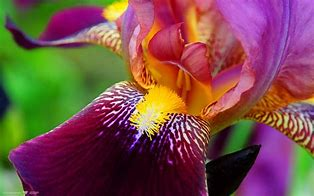

In [ ]:
iris = load_iris()

In [ ]:
# Vérifier la structure de l'objet iris
print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [ ]:
# Afficher les noms des variables explicatives
print(iris.feature_names)

# Afficher le nom de la variable cible
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [ ]:
# Assigner à X les variables explicative et dans y la variable cible
X = iris.data
y = iris.target


In [ ]:
# converir le "array" X en dataframe df_X et ajouter le nom des colonnes
df_X=pd.DataFrame(X,columns=iris.feature_names)

# Afficher les 10 premières lignes
df_X.head(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [ ]:
# Créer un dataframe df_y qui contient la colonne cible y
df_y=pd.DataFrame(y,columns=["y"])

# Ajouter à df_y une colonne "label" avec le nom des modalité de la cible
iris_mapping = {0:'setosa',1:'versicolor',2:'virginica'}
df_y=df_y.assign(label  = df_y.y.map(iris_mapping))

# Afficher les 10 premières lignes de df_y
df_y.head(n=10)

,y,label
0,0,setosa
1,0,setosa
2,0,setosa
3,0,setosa
4,0,setosa
5,0,setosa
6,0,setosa
7,0,setosa
8,0,setosa
9,0,setosa


### <font color="orange">Visualiser les données Iris</font>

In [ ]:
from plotnine.data import mpg
from plotnine import ggplot, aes, facet_grid, labs, geom_point, theme_xkcd



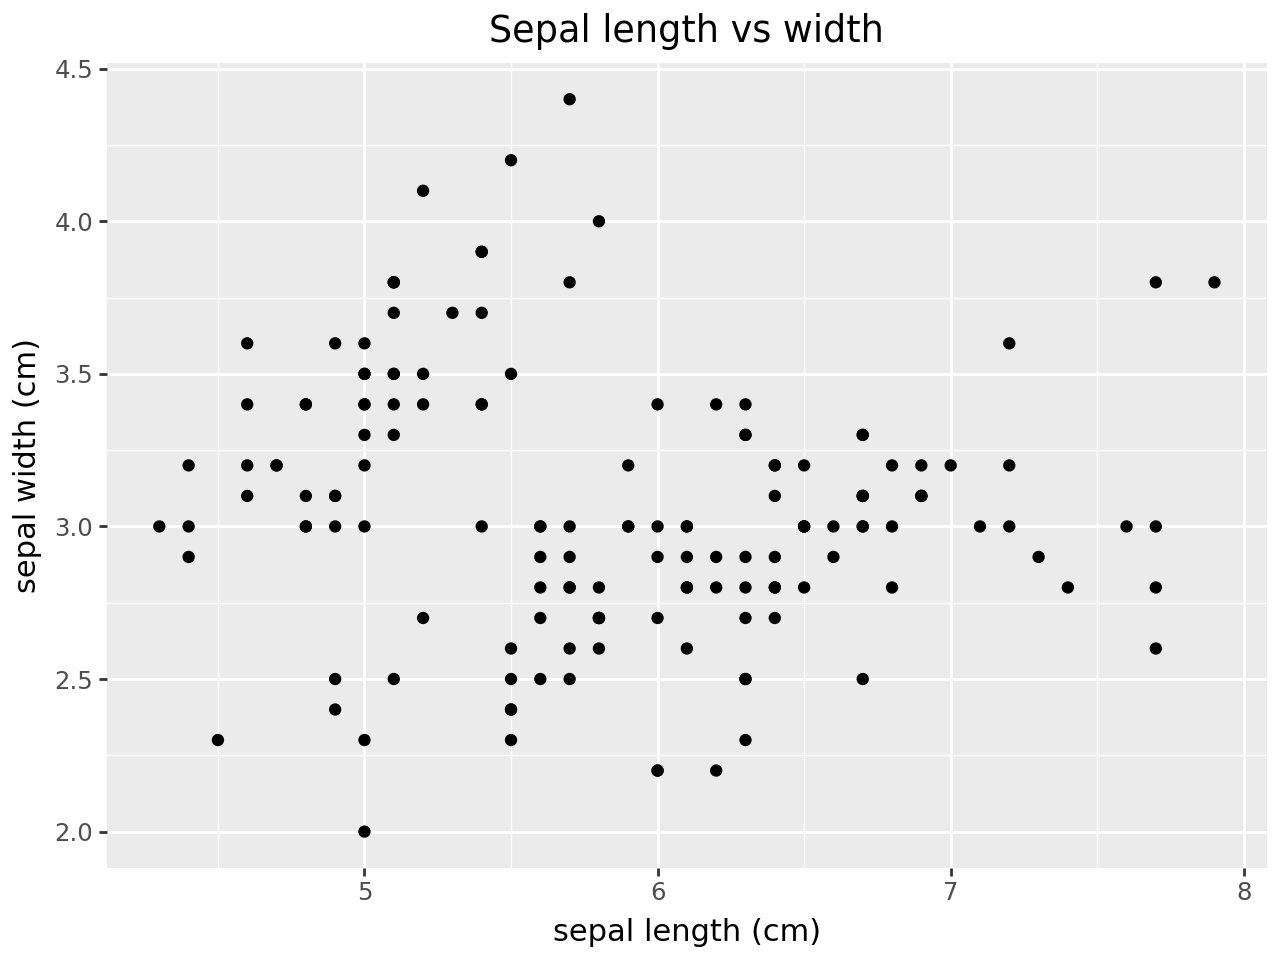

In [ ]:
# créer df_Xy qui contient les df_X et df_y
df_XY=pd.concat([df_X,df_y],axis=1)

# Représenter 'sepal width (cm)' en fonction de 'sepal length (cm)' avec ggplot et geom_point
p = (
    ggplot(df_XY)
    + aes(x='sepal length (cm)', y='sepal width (cm)')
    + labs(
        x="sepal length (cm)",
        y="sepal width (cm)",
        title="Sepal length vs width",
    )
    + geom_point()


)
p

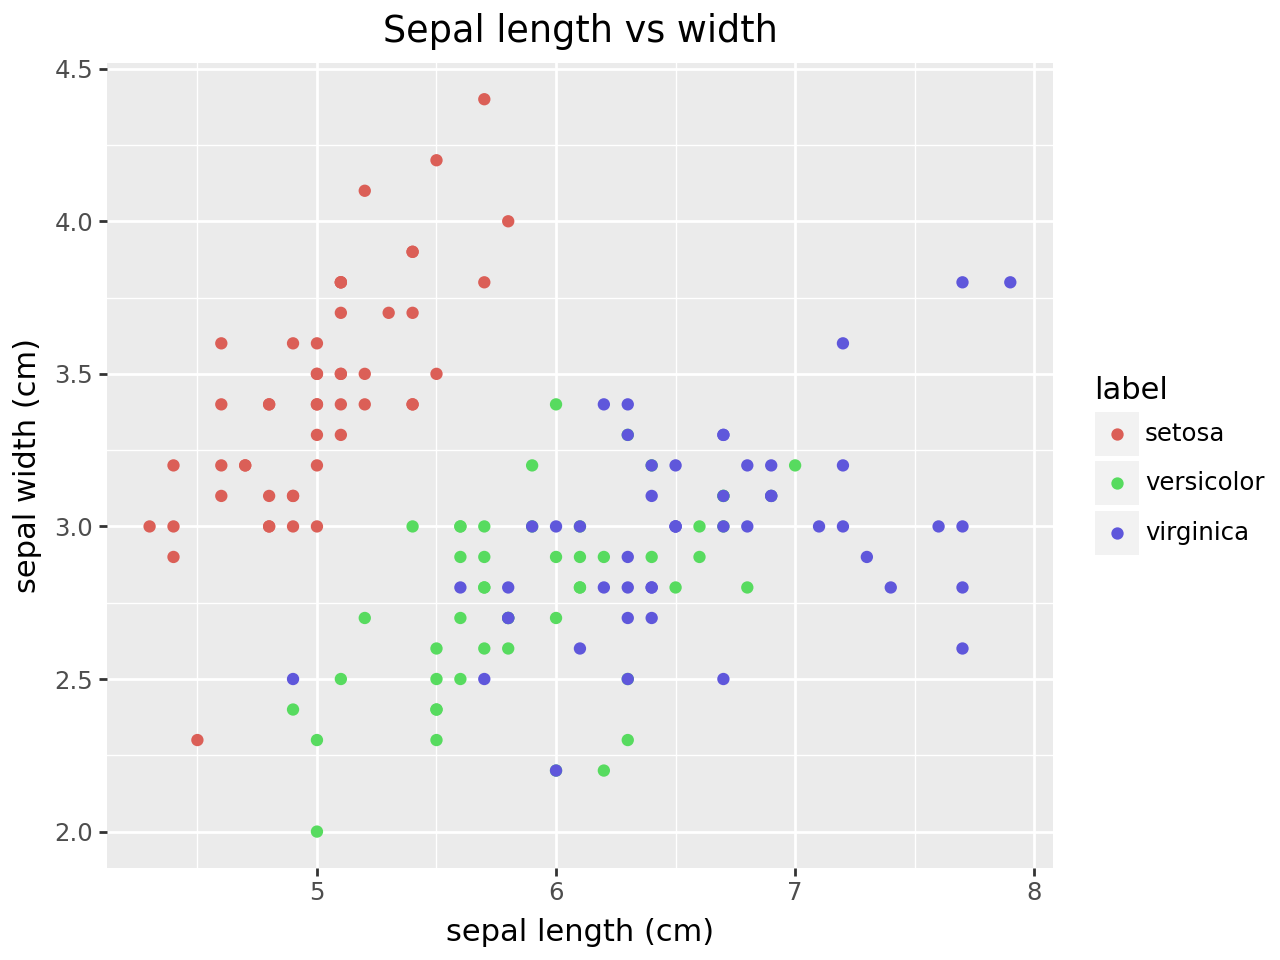

In [ ]:
### Rajouter la couleur en fonction du type de variété

df_XY=pd.concat([df_X,df_y],axis=1)
p = (
    ggplot(df_XY)
    #+ facet_grid(facets=".~y")
    + aes(x='sepal length (cm)', y='sepal width (cm)',color='label')
    + labs(
        x="sepal length (cm)",
        y="sepal width (cm)",
        title="Sepal length vs width",
    )
    + geom_point()
)

p

###  <font color="orange"> Modélisation:Deep learning </font>

#### <font color="blue"> A) Modèle avec 1 seul neurone en sortie </font>

##### Préparation des données

###### a) Filtrer les observations pour ne conserver que les variétés "Virginica" et "versicolor"

In [ ]:
df_y.groupby(['label', 'y']).size().reset_index(name='count')

,label,y,count
0,setosa,0,50
1,versicolor,1,50
2,virginica,2,50


In [ ]:
## supprimer les lignes correspondant à setosa
df_y2=df_y[df_y.label!="setosa"]
df_X2=df_X[df_y.label!="setosa"]

###### b) Binarisation de la variable cible avec la fonction "to_categorical"

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

# Apprentissage et transformation
y_recode = encoder.fit_transform(df_y2[['label']])
y_recode = pd.DataFrame(y_recode.toarray(), columns=encoder.get_feature_names_out())
y_recode

,label_versicolor,label_virginica
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
95,0.0,1.0
96,0.0,1.0
97,0.0,1.0
98,0.0,1.0


In [ ]:
# Ne garder que la variable qui encode versicolor
y_recode=y_recode["label_versicolor"]
y_recode.rename("versicolor", inplace=True)
y_recode.head()

,versicolor
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


###### c) Créer les jeux de calibration & validation

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_X2, y_recode, test_size=0.30,  stratify=y_recode, shuffle=True)

print("Training Input shape\t: {}".format(x_train.shape))
print("Testing Input shape\t: {}".format(x_test.shape))
print("Training Output shape\t: {}".format(y_train.shape))
print("Testing Output shape\t: {}".format(y_test.shape))

Training Input shape	: (70, 4)
Testing Input shape	: (30, 4)
Training Output shape	: (70,)
Testing Output shape	: (30,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##### Construction du modèle

In [ ]:
# construction du modèle
model = Sequential()
# ajouter une couche d'entrée en précisant le nombre d'input
model.add(Input(shape=(4,)))
# ajouter la couche de sortie composé de 1 neurone avec une fonction d'activation sigmoïde
#model.add(Dropout(rate=0.25))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
# Afficher la structure du modèle
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Préciser les paramètres d'optimisation du modèle (loss, optimizer et metrics)
model.compile(loss='BinaryCrossentropy',
              metrics=[F1Score(threshold=0.5)])

In [ ]:
# Rajouter un Checkpoint pour sauvegarder le meilleur modèle selon la validation loss et éviter le surajustement
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
   'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)


##### Ajustement du modèlesur les données d'entrainement

In [ ]:
history= model.fit(x_train, y_train,validation_split=0.15, batch_size=150, epochs=800, verbose=1,callbacks=[checkpoint])

##### Visualisation de l'ajustement et recheche du meilleur modèle

In [ ]:
db_val_plot = pd.DataFrame(history.history)
db_val_plot['x']=np.arange(0,len(db_val_plot))
db_val_plot.head()

,f1_score,loss,val_f1_score,val_loss,x
0,0.885246,0.310177,0.666667,0.580926,0
1,0.885246,0.309155,0.666667,0.580734,1
2,0.885246,0.308425,0.666667,0.580574,2
3,0.885246,0.307820,0.666667,0.580433,3
4,0.885246,0.307288,0.666667,0.580303,4


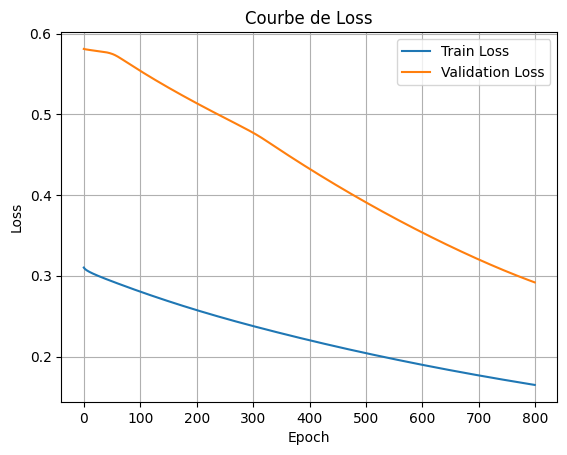

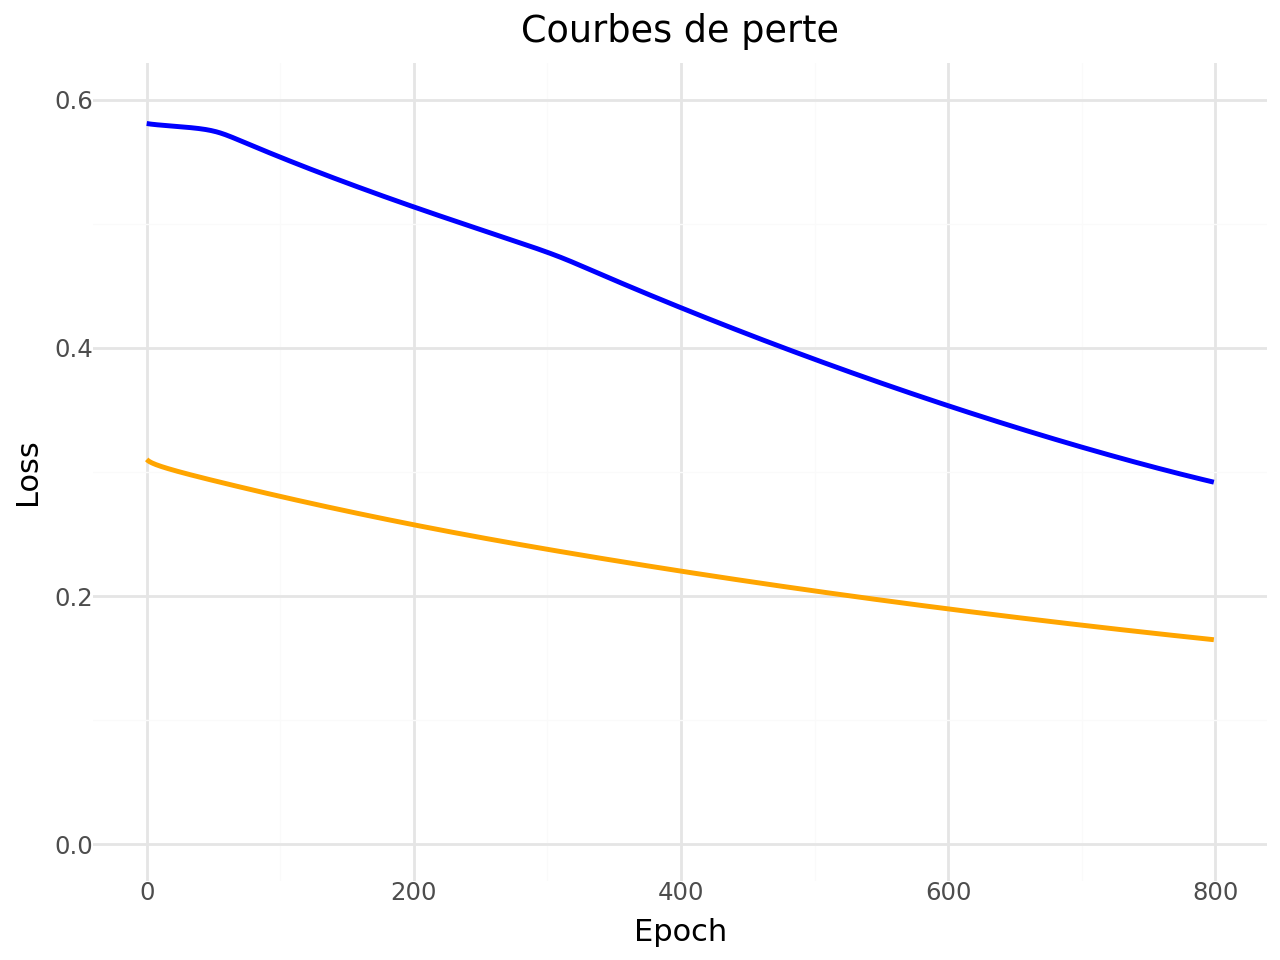

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de Loss')
plt.legend()
plt.grid(True)
plt.show()

from plotnine import *
p = (
    ggplot(db_val_plot)
    #+ facet_grid(facets=".~y")
    + labs(
        x="Epoch",
        y="Loss",
        title="Courbes de perte",
    )
    +  geom_line(aes(x='x', y='val_loss'),color="blue",size=1)
    +  geom_line(aes(x='x', y='loss'),color="orange",size=1)
    + ylim(0,.6)
    + theme_minimal()
)

p

In [ ]:
best_epoch = np.argmin(history.history['val_loss']) + 1
print(f"Meilleur epoch selon validation loss : {best_epoch}")

Meilleur epoch selon validation loss : 800


In [ ]:
from keras.models import load_model

best_model = load_model('/content/best_model.h5')


In [ ]:
loss, accuracy = best_model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - f1_score: 0.9333 - loss: 0.2360
Test accuracy: 0.9333332777023315


##### Prédiction sur les données de test





In [ ]:
# Appliquer le modèle pour prédire les variétés des Iris du jeu de test et stoker dans "y_test_pred"
y_test_pred=best_model.predict(x_test)

# créer un data frame df_y_test_pred
df_y_test_pred=pd.DataFrame(y_test_pred,columns=['prob'],index=y_test.index)
df_y_test_pred.head()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


,prob
1,0.820219
18,0.613325
6,0.685828
94,0.006266
44,0.918437


##### *Recoder les probabilités en "Virginica" et "Versicolor"*

In [ ]:
# ajouter une colonne label qui contient le nom de la variété : si prob < 0.5 "virginica" si prob >= 0.5 versicolor
df_y_test_pred = df_y_test_pred.assign(label=np.where(df_y_test_pred['prob'] < 0.5, 'virginica', 'versicolor'))


##### *Ajouter les valeurs observées et les labels correspondant*

In [ ]:
# ajouter une colonne y_obs qui contient la vraie valeur y_test
df_y_test_pred['y_obs']=pd.DataFrame(y_test)

# ajouter une colonne 'label_obs' qui contient le nom de la variété : si prob < 0.5 "virginica" si prob >= 0.5 versicolor
df_y_test_pred = df_y_test_pred.assign(label_obs=np.where(df_y_test_pred['y_obs'] < 0.5, 'virginica', 'versicolor'))
df_y_test_pred.head()

,prob,label,y_obs,label_obs
1,0.820219,versicolor,1.0,versicolor
18,0.613325,versicolor,1.0,versicolor
6,0.685828,versicolor,1.0,versicolor
94,0.006266,virginica,0.0,virginica
44,0.918437,versicolor,1.0,versicolor


##### Evaluer la Performance du modèle

In [ ]:
##matrice de confusion
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
print("Matrice de confusion:")
cm = confusion_matrix(df_y_test_pred.label_obs,df_y_test_pred.label)
print(pd.DataFrame(cm))
print(metrics.classification_report(df_y_test_pred.label_obs, df_y_test_pred.label, digits=3))

Matrice de confusion:
    0   1
0  13   2
1   0  15
              precision    recall  f1-score   support

  versicolor      1.000     0.867     0.929        15
   virginica      0.882     1.000     0.938        15

    accuracy                          0.933        30
   macro avg      0.941     0.933     0.933        30
weighted avg      0.941     0.933     0.933        30



In [ ]:
model.get_weights()

[array([[ 0.03188171],
        [ 0.33117387],
        [-1.7367445 ],
        [-1.8379763 ]], dtype=float32),
 array([-0.11179024], dtype=float32)]

##### Comparaison avec une régression logistique

In [ ]:
from sklearn.linear_model import LogisticRegression # import de la classe

modelrl = LogisticRegression(C=10^5) # construction d'un objet de Régression logistique
modelrl.fit(x_train, y_train) # Entrainement du modèle


LogisticRegression(C=15)

In [ ]:
modelrl.coef_

array([[ 0.40728872,  0.92077941, -4.8104831 , -3.83664161]])

In [ ]:
df_y_test_pred['ypred_lr']=modelrl.predict_proba(x_test)[:,1]

In [ ]:
df_y_test_pred.head(n=10)

,prob,label,y_obs,label_obs,ypred_lr
1,0.820219,versicolor,1.0,versicolor,0.988223
18,0.613325,versicolor,1.0,versicolor,0.801447
6,0.685828,versicolor,1.0,versicolor,0.932609
94,0.006266,virginica,0.0,virginica,0.000021
44,0.918437,versicolor,1.0,versicolor,0.997439
28,0.765736,versicolor,1.0,versicolor,0.964732
98,0.028741,virginica,0.0,virginica,0.000659
23,0.873152,versicolor,1.0,versicolor,0.989630
33,0.332890,virginica,1.0,versicolor,0.166248
4,0.710056,versicolor,1.0,versicolor,0.939945


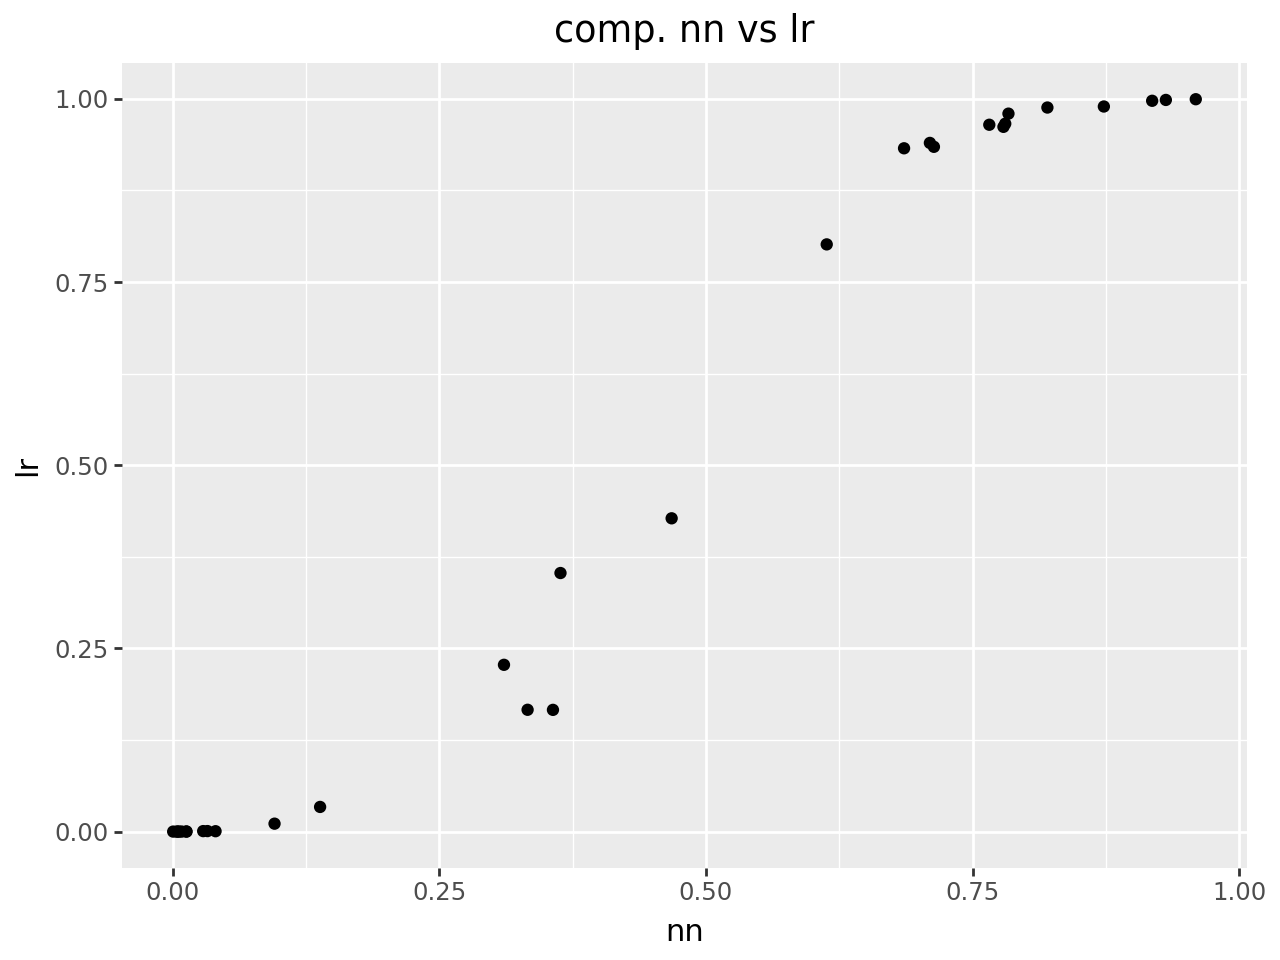

In [ ]:

(
    ggplot(df_y_test_pred)
    + aes(x='prob', y='ypred_lr')
    + labs(
        x="nn",
        y="lr",
        title="comp. nn vs lr",
    )
    + geom_point()


)

**Quels sont vos commentaires ou remarques :**


*   
*   



#### <font color="blue"> B) Modèle avec 3 neurones en sortie : Setosa, Virginica et Versicolor </font>

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

# Apprentissage et transformation
y_recode = encoder.fit_transform(df_y[['label']])
y_recode = pd.DataFrame(y_recode.toarray(), columns=encoder.get_feature_names_out())
y_recode.head()

,label_setosa,label_versicolor,label_virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [ ]:
y_recode.columns = iris.target_names
y_recode.head()

,setosa,versicolor,virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_X, y_recode, test_size=0.30,  stratify=y_recode, shuffle=True)

print("Training Input shape\t: {}".format(x_train.shape))
print("Testing Input shape\t: {}".format(x_test.shape))
print("Training Output shape\t: {}".format(y_train.shape))
print("Testing Output shape\t: {}".format(y_test.shape))

Training Input shape	: (105, 4)
Testing Input shape	: (45, 4)
Training Output shape	: (105, 3)
Testing Output shape	: (45, 3)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# construction du modèle
model = Sequential()
# ajouter une couche d'entrée en précisant le nombre d'input
model.add(Input(shape=(4,)))
#model.add(Dropout(.25))
model.add(Dense(3, activation='softmax'))

# Préciser les paramètres d'optimisation du modèle (loss, optimizer et metrics)
model.compile(loss='CategoricalCrossentropy',
              metrics=[F1Score(threshold=0.5)])


In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
   'best_model_2.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)


In [ ]:
# ajustement du modèle (Enregistrer le temps CPU vs GPU)
#model.fit(x_train, y_train, batch_size=70, epochs=100, verbose=0)
history = model.fit(x_train, y_train,validation_split=0.15, batch_size=150, epochs=800, verbose=0,callbacks=[checkpoint])


Epoch 1: val_loss improved from inf to 1.27756, saving model to best_model_2.h5



Epoch 2: val_loss improved from 1.27756 to 1.27248, saving model to best_model_2.h5



Epoch 3: val_loss improved from 1.27248 to 1.26825, saving model to best_model_2.h5



Epoch 4: val_loss improved from 1.26825 to 1.26452, saving model to best_model_2.h5



Epoch 5: val_loss improved from 1.26452 to 1.26112, saving model to best_model_2.h5



Epoch 6: val_loss improved from 1.26112 to 1.25795, saving model to best_model_2.h5



Epoch 7: val_loss improved from 1.25795 to 1.25496, saving model to best_model_2.h5



Epoch 8: val_loss improved from 1.25496 to 1.25211, saving model to best_model_2.h5



Epoch 9: val_loss improved from 1.25211 to 1.24937, saving model to best_model_2.h5



Epoch 10: val_loss improved from 1.24937 to 1.24672, saving model to best_model_2.h5



Epoch 11: val_loss improved from 1.24672 to 1.24415, saving model to best_model_2.h5



Epoch 12: val_loss improved from 1.24415 to 1.24165, saving model to best_model_2.h5



Epoch 13: val_loss improved from 1.24165 to 1.23920, saving model to best_model_2.h5



Epoch 14: val_loss improved from 1.23920 to 1.23680, saving model to best_model_2.h5



Epoch 15: val_loss improved from 1.23680 to 1.23444, saving model to best_model_2.h5



Epoch 16: val_loss improved from 1.23444 to 1.23212, saving model to best_model_2.h5



Epoch 17: val_loss improved from 1.23212 to 1.22983, saving model to best_model_2.h5



Epoch 18: val_loss improved from 1.22983 to 1.22757, saving model to best_model_2.h5



Epoch 19: val_loss improved from 1.22757 to 1.22533, saving model to best_model_2.h5



Epoch 20: val_loss improved from 1.22533 to 1.22312, saving model to best_model_2.h5



Epoch 21: val_loss improved from 1.22312 to 1.22093, saving model to best_model_2.h5



Epoch 22: val_loss improved from 1.22093 to 1.21876, saving model to best_model_2.h5



Epoch 23: val_loss improved from 1.21876 to 1.21661, saving model to best_model_2.h5



Epoch 24: val_loss improved from 1.21661 to 1.21447, saving model to best_model_2.h5



Epoch 25: val_loss improved from 1.21447 to 1.21235, saving model to best_model_2.h5



Epoch 26: val_loss improved from 1.21235 to 1.21024, saving model to best_model_2.h5



Epoch 27: val_loss improved from 1.21024 to 1.20814, saving model to best_model_2.h5



Epoch 28: val_loss improved from 1.20814 to 1.20605, saving model to best_model_2.h5



Epoch 29: val_loss improved from 1.20605 to 1.20398, saving model to best_model_2.h5



Epoch 30: val_loss improved from 1.20398 to 1.20192, saving model to best_model_2.h5



Epoch 31: val_loss improved from 1.20192 to 1.19986, saving model to best_model_2.h5



Epoch 32: val_loss improved from 1.19986 to 1.19781, saving model to best_model_2.h5



Epoch 33: val_loss improved from 1.19781 to 1.19577, saving model to best_model_2.h5



Epoch 34: val_loss improved from 1.19577 to 1.19374, saving model to best_model_2.h5



Epoch 35: val_loss improved from 1.19374 to 1.19172, saving model to best_model_2.h5



Epoch 36: val_loss improved from 1.19172 to 1.18970, saving model to best_model_2.h5



Epoch 37: val_loss improved from 1.18970 to 1.18769, saving model to best_model_2.h5



Epoch 38: val_loss improved from 1.18769 to 1.18568, saving model to best_model_2.h5



Epoch 39: val_loss improved from 1.18568 to 1.18368, saving model to best_model_2.h5



Epoch 40: val_loss improved from 1.18368 to 1.18169, saving model to best_model_2.h5



Epoch 41: val_loss improved from 1.18169 to 1.17970, saving model to best_model_2.h5



Epoch 42: val_loss improved from 1.17970 to 1.17771, saving model to best_model_2.h5



Epoch 43: val_loss improved from 1.17771 to 1.17573, saving model to best_model_2.h5



Epoch 44: val_loss improved from 1.17573 to 1.17376, saving model to best_model_2.h5



Epoch 45: val_loss improved from 1.17376 to 1.17178, saving model to best_model_2.h5



Epoch 46: val_loss improved from 1.17178 to 1.16981, saving model to best_model_2.h5



Epoch 47: val_loss improved from 1.16981 to 1.16785, saving model to best_model_2.h5



Epoch 48: val_loss improved from 1.16785 to 1.16588, saving model to best_model_2.h5



Epoch 49: val_loss improved from 1.16588 to 1.16392, saving model to best_model_2.h5



Epoch 50: val_loss improved from 1.16392 to 1.16196, saving model to best_model_2.h5



Epoch 51: val_loss improved from 1.16196 to 1.16001, saving model to best_model_2.h5



Epoch 52: val_loss improved from 1.16001 to 1.15805, saving model to best_model_2.h5



Epoch 53: val_loss improved from 1.15805 to 1.15610, saving model to best_model_2.h5



Epoch 54: val_loss improved from 1.15610 to 1.15414, saving model to best_model_2.h5



Epoch 55: val_loss improved from 1.15414 to 1.15219, saving model to best_model_2.h5



Epoch 56: val_loss improved from 1.15219 to 1.15023, saving model to best_model_2.h5



Epoch 57: val_loss improved from 1.15023 to 1.14828, saving model to best_model_2.h5



Epoch 58: val_loss improved from 1.14828 to 1.14632, saving model to best_model_2.h5



Epoch 59: val_loss improved from 1.14632 to 1.14437, saving model to best_model_2.h5



Epoch 60: val_loss improved from 1.14437 to 1.14241, saving model to best_model_2.h5



Epoch 61: val_loss improved from 1.14241 to 1.14045, saving model to best_model_2.h5



Epoch 62: val_loss improved from 1.14045 to 1.13848, saving model to best_model_2.h5



Epoch 63: val_loss improved from 1.13848 to 1.13651, saving model to best_model_2.h5



Epoch 64: val_loss improved from 1.13651 to 1.13454, saving model to best_model_2.h5



Epoch 65: val_loss improved from 1.13454 to 1.13257, saving model to best_model_2.h5



Epoch 66: val_loss improved from 1.13257 to 1.13058, saving model to best_model_2.h5



Epoch 67: val_loss improved from 1.13058 to 1.12859, saving model to best_model_2.h5



Epoch 68: val_loss improved from 1.12859 to 1.12660, saving model to best_model_2.h5



Epoch 69: val_loss improved from 1.12660 to 1.12460, saving model to best_model_2.h5



Epoch 70: val_loss improved from 1.12460 to 1.12259, saving model to best_model_2.h5



Epoch 71: val_loss improved from 1.12259 to 1.12057, saving model to best_model_2.h5



Epoch 72: val_loss improved from 1.12057 to 1.11854, saving model to best_model_2.h5



Epoch 73: val_loss improved from 1.11854 to 1.11651, saving model to best_model_2.h5



Epoch 74: val_loss improved from 1.11651 to 1.11446, saving model to best_model_2.h5



Epoch 75: val_loss improved from 1.11446 to 1.11241, saving model to best_model_2.h5



Epoch 76: val_loss improved from 1.11241 to 1.11035, saving model to best_model_2.h5



Epoch 77: val_loss improved from 1.11035 to 1.10828, saving model to best_model_2.h5



Epoch 78: val_loss improved from 1.10828 to 1.10620, saving model to best_model_2.h5



Epoch 79: val_loss improved from 1.10620 to 1.10412, saving model to best_model_2.h5



Epoch 80: val_loss improved from 1.10412 to 1.10203, saving model to best_model_2.h5



Epoch 81: val_loss improved from 1.10203 to 1.09993, saving model to best_model_2.h5



Epoch 82: val_loss improved from 1.09993 to 1.09783, saving model to best_model_2.h5



Epoch 83: val_loss improved from 1.09783 to 1.09572, saving model to best_model_2.h5



Epoch 84: val_loss improved from 1.09572 to 1.09361, saving model to best_model_2.h5



Epoch 85: val_loss improved from 1.09361 to 1.09150, saving model to best_model_2.h5



Epoch 86: val_loss improved from 1.09150 to 1.08939, saving model to best_model_2.h5



Epoch 87: val_loss improved from 1.08939 to 1.08728, saving model to best_model_2.h5



Epoch 88: val_loss improved from 1.08728 to 1.08517, saving model to best_model_2.h5



Epoch 89: val_loss improved from 1.08517 to 1.08306, saving model to best_model_2.h5



Epoch 90: val_loss improved from 1.08306 to 1.08095, saving model to best_model_2.h5



Epoch 91: val_loss improved from 1.08095 to 1.07885, saving model to best_model_2.h5



Epoch 92: val_loss improved from 1.07885 to 1.07675, saving model to best_model_2.h5



Epoch 93: val_loss improved from 1.07675 to 1.07465, saving model to best_model_2.h5



Epoch 94: val_loss improved from 1.07465 to 1.07255, saving model to best_model_2.h5



Epoch 95: val_loss improved from 1.07255 to 1.07046, saving model to best_model_2.h5



Epoch 96: val_loss improved from 1.07046 to 1.06838, saving model to best_model_2.h5



Epoch 97: val_loss improved from 1.06838 to 1.06629, saving model to best_model_2.h5



Epoch 98: val_loss improved from 1.06629 to 1.06421, saving model to best_model_2.h5



Epoch 99: val_loss improved from 1.06421 to 1.06214, saving model to best_model_2.h5



Epoch 100: val_loss improved from 1.06214 to 1.06006, saving model to best_model_2.h5



Epoch 101: val_loss improved from 1.06006 to 1.05799, saving model to best_model_2.h5



Epoch 102: val_loss improved from 1.05799 to 1.05593, saving model to best_model_2.h5



Epoch 103: val_loss improved from 1.05593 to 1.05386, saving model to best_model_2.h5



Epoch 104: val_loss improved from 1.05386 to 1.05180, saving model to best_model_2.h5



Epoch 105: val_loss improved from 1.05180 to 1.04974, saving model to best_model_2.h5



Epoch 106: val_loss improved from 1.04974 to 1.04768, saving model to best_model_2.h5



Epoch 107: val_loss improved from 1.04768 to 1.04562, saving model to best_model_2.h5



Epoch 108: val_loss improved from 1.04562 to 1.04357, saving model to best_model_2.h5



Epoch 109: val_loss improved from 1.04357 to 1.04151, saving model to best_model_2.h5



Epoch 110: val_loss improved from 1.04151 to 1.03945, saving model to best_model_2.h5



Epoch 111: val_loss improved from 1.03945 to 1.03740, saving model to best_model_2.h5



Epoch 112: val_loss improved from 1.03740 to 1.03534, saving model to best_model_2.h5



Epoch 113: val_loss improved from 1.03534 to 1.03328, saving model to best_model_2.h5



Epoch 114: val_loss improved from 1.03328 to 1.03121, saving model to best_model_2.h5



Epoch 115: val_loss improved from 1.03121 to 1.02915, saving model to best_model_2.h5



Epoch 116: val_loss improved from 1.02915 to 1.02708, saving model to best_model_2.h5



Epoch 117: val_loss improved from 1.02708 to 1.02500, saving model to best_model_2.h5



Epoch 118: val_loss improved from 1.02500 to 1.02292, saving model to best_model_2.h5



Epoch 119: val_loss improved from 1.02292 to 1.02084, saving model to best_model_2.h5



Epoch 120: val_loss improved from 1.02084 to 1.01875, saving model to best_model_2.h5



Epoch 121: val_loss improved from 1.01875 to 1.01666, saving model to best_model_2.h5



Epoch 122: val_loss improved from 1.01666 to 1.01455, saving model to best_model_2.h5



Epoch 123: val_loss improved from 1.01455 to 1.01245, saving model to best_model_2.h5



Epoch 124: val_loss improved from 1.01245 to 1.01033, saving model to best_model_2.h5



Epoch 125: val_loss improved from 1.01033 to 1.00821, saving model to best_model_2.h5



Epoch 126: val_loss improved from 1.00821 to 1.00608, saving model to best_model_2.h5



Epoch 127: val_loss improved from 1.00608 to 1.00395, saving model to best_model_2.h5



Epoch 128: val_loss improved from 1.00395 to 1.00181, saving model to best_model_2.h5



Epoch 129: val_loss improved from 1.00181 to 0.99966, saving model to best_model_2.h5



Epoch 130: val_loss improved from 0.99966 to 0.99751, saving model to best_model_2.h5



Epoch 131: val_loss improved from 0.99751 to 0.99535, saving model to best_model_2.h5



Epoch 132: val_loss improved from 0.99535 to 0.99319, saving model to best_model_2.h5



Epoch 133: val_loss improved from 0.99319 to 0.99103, saving model to best_model_2.h5



Epoch 134: val_loss improved from 0.99103 to 0.98887, saving model to best_model_2.h5



Epoch 135: val_loss improved from 0.98887 to 0.98670, saving model to best_model_2.h5



Epoch 136: val_loss improved from 0.98670 to 0.98454, saving model to best_model_2.h5



Epoch 137: val_loss improved from 0.98454 to 0.98238, saving model to best_model_2.h5



Epoch 138: val_loss improved from 0.98238 to 0.98022, saving model to best_model_2.h5



Epoch 139: val_loss improved from 0.98022 to 0.97806, saving model to best_model_2.h5



Epoch 140: val_loss improved from 0.97806 to 0.97591, saving model to best_model_2.h5



Epoch 141: val_loss improved from 0.97591 to 0.97376, saving model to best_model_2.h5



Epoch 142: val_loss improved from 0.97376 to 0.97162, saving model to best_model_2.h5



Epoch 143: val_loss improved from 0.97162 to 0.96948, saving model to best_model_2.h5



Epoch 144: val_loss improved from 0.96948 to 0.96735, saving model to best_model_2.h5



Epoch 145: val_loss improved from 0.96735 to 0.96522, saving model to best_model_2.h5



Epoch 146: val_loss improved from 0.96522 to 0.96310, saving model to best_model_2.h5



Epoch 147: val_loss improved from 0.96310 to 0.96099, saving model to best_model_2.h5



Epoch 148: val_loss improved from 0.96099 to 0.95889, saving model to best_model_2.h5



Epoch 149: val_loss improved from 0.95889 to 0.95679, saving model to best_model_2.h5



Epoch 150: val_loss improved from 0.95679 to 0.95470, saving model to best_model_2.h5



Epoch 151: val_loss improved from 0.95470 to 0.95262, saving model to best_model_2.h5



Epoch 152: val_loss improved from 0.95262 to 0.95054, saving model to best_model_2.h5



Epoch 153: val_loss improved from 0.95054 to 0.94847, saving model to best_model_2.h5



Epoch 154: val_loss improved from 0.94847 to 0.94641, saving model to best_model_2.h5



Epoch 155: val_loss improved from 0.94641 to 0.94436, saving model to best_model_2.h5



Epoch 156: val_loss improved from 0.94436 to 0.94232, saving model to best_model_2.h5



Epoch 157: val_loss improved from 0.94232 to 0.94028, saving model to best_model_2.h5



Epoch 158: val_loss improved from 0.94028 to 0.93825, saving model to best_model_2.h5



Epoch 159: val_loss improved from 0.93825 to 0.93623, saving model to best_model_2.h5



Epoch 160: val_loss improved from 0.93623 to 0.93421, saving model to best_model_2.h5



Epoch 161: val_loss improved from 0.93421 to 0.93221, saving model to best_model_2.h5



Epoch 162: val_loss improved from 0.93221 to 0.93021, saving model to best_model_2.h5



Epoch 163: val_loss improved from 0.93021 to 0.92821, saving model to best_model_2.h5



Epoch 164: val_loss improved from 0.92821 to 0.92623, saving model to best_model_2.h5



Epoch 165: val_loss improved from 0.92623 to 0.92425, saving model to best_model_2.h5



Epoch 166: val_loss improved from 0.92425 to 0.92228, saving model to best_model_2.h5



Epoch 167: val_loss improved from 0.92228 to 0.92031, saving model to best_model_2.h5



Epoch 168: val_loss improved from 0.92031 to 0.91836, saving model to best_model_2.h5



Epoch 169: val_loss improved from 0.91836 to 0.91641, saving model to best_model_2.h5



Epoch 170: val_loss improved from 0.91641 to 0.91447, saving model to best_model_2.h5



Epoch 171: val_loss improved from 0.91447 to 0.91253, saving model to best_model_2.h5



Epoch 172: val_loss improved from 0.91253 to 0.91060, saving model to best_model_2.h5



Epoch 173: val_loss improved from 0.91060 to 0.90868, saving model to best_model_2.h5



Epoch 174: val_loss improved from 0.90868 to 0.90676, saving model to best_model_2.h5



Epoch 175: val_loss improved from 0.90676 to 0.90485, saving model to best_model_2.h5



Epoch 176: val_loss improved from 0.90485 to 0.90295, saving model to best_model_2.h5



Epoch 177: val_loss improved from 0.90295 to 0.90105, saving model to best_model_2.h5



Epoch 178: val_loss improved from 0.90105 to 0.89916, saving model to best_model_2.h5



Epoch 179: val_loss improved from 0.89916 to 0.89728, saving model to best_model_2.h5



Epoch 180: val_loss improved from 0.89728 to 0.89540, saving model to best_model_2.h5



Epoch 181: val_loss improved from 0.89540 to 0.89353, saving model to best_model_2.h5



Epoch 182: val_loss improved from 0.89353 to 0.89166, saving model to best_model_2.h5



Epoch 183: val_loss improved from 0.89166 to 0.88980, saving model to best_model_2.h5



Epoch 184: val_loss improved from 0.88980 to 0.88795, saving model to best_model_2.h5



Epoch 185: val_loss improved from 0.88795 to 0.88610, saving model to best_model_2.h5



Epoch 186: val_loss improved from 0.88610 to 0.88426, saving model to best_model_2.h5



Epoch 187: val_loss improved from 0.88426 to 0.88243, saving model to best_model_2.h5



Epoch 188: val_loss improved from 0.88243 to 0.88060, saving model to best_model_2.h5



Epoch 189: val_loss improved from 0.88060 to 0.87878, saving model to best_model_2.h5



Epoch 190: val_loss improved from 0.87878 to 0.87696, saving model to best_model_2.h5



Epoch 191: val_loss improved from 0.87696 to 0.87515, saving model to best_model_2.h5



Epoch 192: val_loss improved from 0.87515 to 0.87335, saving model to best_model_2.h5



Epoch 193: val_loss improved from 0.87335 to 0.87156, saving model to best_model_2.h5



Epoch 194: val_loss improved from 0.87156 to 0.86977, saving model to best_model_2.h5



Epoch 195: val_loss improved from 0.86977 to 0.86799, saving model to best_model_2.h5



Epoch 196: val_loss improved from 0.86799 to 0.86622, saving model to best_model_2.h5



Epoch 197: val_loss improved from 0.86622 to 0.86445, saving model to best_model_2.h5



Epoch 198: val_loss improved from 0.86445 to 0.86269, saving model to best_model_2.h5



Epoch 199: val_loss improved from 0.86269 to 0.86094, saving model to best_model_2.h5



Epoch 200: val_loss improved from 0.86094 to 0.85920, saving model to best_model_2.h5



Epoch 201: val_loss improved from 0.85920 to 0.85746, saving model to best_model_2.h5



Epoch 202: val_loss improved from 0.85746 to 0.85574, saving model to best_model_2.h5



Epoch 203: val_loss improved from 0.85574 to 0.85401, saving model to best_model_2.h5



Epoch 204: val_loss improved from 0.85401 to 0.85230, saving model to best_model_2.h5



Epoch 205: val_loss improved from 0.85230 to 0.85059, saving model to best_model_2.h5



Epoch 206: val_loss improved from 0.85059 to 0.84889, saving model to best_model_2.h5



Epoch 207: val_loss improved from 0.84889 to 0.84720, saving model to best_model_2.h5



Epoch 208: val_loss improved from 0.84720 to 0.84552, saving model to best_model_2.h5



Epoch 209: val_loss improved from 0.84552 to 0.84384, saving model to best_model_2.h5



Epoch 210: val_loss improved from 0.84384 to 0.84217, saving model to best_model_2.h5



Epoch 211: val_loss improved from 0.84217 to 0.84051, saving model to best_model_2.h5



Epoch 212: val_loss improved from 0.84051 to 0.83885, saving model to best_model_2.h5



Epoch 213: val_loss improved from 0.83885 to 0.83720, saving model to best_model_2.h5



Epoch 214: val_loss improved from 0.83720 to 0.83556, saving model to best_model_2.h5



Epoch 215: val_loss improved from 0.83556 to 0.83393, saving model to best_model_2.h5



Epoch 216: val_loss improved from 0.83393 to 0.83230, saving model to best_model_2.h5



Epoch 217: val_loss improved from 0.83230 to 0.83068, saving model to best_model_2.h5



Epoch 218: val_loss improved from 0.83068 to 0.82907, saving model to best_model_2.h5



Epoch 219: val_loss improved from 0.82907 to 0.82746, saving model to best_model_2.h5



Epoch 220: val_loss improved from 0.82746 to 0.82586, saving model to best_model_2.h5



Epoch 221: val_loss improved from 0.82586 to 0.82427, saving model to best_model_2.h5



Epoch 222: val_loss improved from 0.82427 to 0.82268, saving model to best_model_2.h5



Epoch 223: val_loss improved from 0.82268 to 0.82110, saving model to best_model_2.h5



Epoch 224: val_loss improved from 0.82110 to 0.81953, saving model to best_model_2.h5



Epoch 225: val_loss improved from 0.81953 to 0.81797, saving model to best_model_2.h5



Epoch 226: val_loss improved from 0.81797 to 0.81641, saving model to best_model_2.h5



Epoch 227: val_loss improved from 0.81641 to 0.81486, saving model to best_model_2.h5



Epoch 228: val_loss improved from 0.81486 to 0.81332, saving model to best_model_2.h5



Epoch 229: val_loss improved from 0.81332 to 0.81178, saving model to best_model_2.h5



Epoch 230: val_loss improved from 0.81178 to 0.81025, saving model to best_model_2.h5



Epoch 231: val_loss improved from 0.81025 to 0.80873, saving model to best_model_2.h5



Epoch 232: val_loss improved from 0.80873 to 0.80721, saving model to best_model_2.h5



Epoch 233: val_loss improved from 0.80721 to 0.80570, saving model to best_model_2.h5



Epoch 234: val_loss improved from 0.80570 to 0.80420, saving model to best_model_2.h5



Epoch 235: val_loss improved from 0.80420 to 0.80271, saving model to best_model_2.h5



Epoch 236: val_loss improved from 0.80271 to 0.80122, saving model to best_model_2.h5



Epoch 237: val_loss improved from 0.80122 to 0.79974, saving model to best_model_2.h5



Epoch 238: val_loss improved from 0.79974 to 0.79826, saving model to best_model_2.h5



Epoch 239: val_loss improved from 0.79826 to 0.79679, saving model to best_model_2.h5



Epoch 240: val_loss improved from 0.79679 to 0.79533, saving model to best_model_2.h5



Epoch 241: val_loss improved from 0.79533 to 0.79388, saving model to best_model_2.h5



Epoch 242: val_loss improved from 0.79388 to 0.79243, saving model to best_model_2.h5



Epoch 243: val_loss improved from 0.79243 to 0.79099, saving model to best_model_2.h5



Epoch 244: val_loss improved from 0.79099 to 0.78956, saving model to best_model_2.h5



Epoch 245: val_loss improved from 0.78956 to 0.78813, saving model to best_model_2.h5



Epoch 246: val_loss improved from 0.78813 to 0.78671, saving model to best_model_2.h5



Epoch 247: val_loss improved from 0.78671 to 0.78530, saving model to best_model_2.h5



Epoch 248: val_loss improved from 0.78530 to 0.78389, saving model to best_model_2.h5



Epoch 249: val_loss improved from 0.78389 to 0.78249, saving model to best_model_2.h5



Epoch 250: val_loss improved from 0.78249 to 0.78110, saving model to best_model_2.h5



Epoch 251: val_loss improved from 0.78110 to 0.77971, saving model to best_model_2.h5



Epoch 252: val_loss improved from 0.77971 to 0.77833, saving model to best_model_2.h5



Epoch 253: val_loss improved from 0.77833 to 0.77696, saving model to best_model_2.h5



Epoch 254: val_loss improved from 0.77696 to 0.77560, saving model to best_model_2.h5



Epoch 255: val_loss improved from 0.77560 to 0.77424, saving model to best_model_2.h5



Epoch 256: val_loss improved from 0.77424 to 0.77289, saving model to best_model_2.h5



Epoch 257: val_loss improved from 0.77289 to 0.77154, saving model to best_model_2.h5



Epoch 258: val_loss improved from 0.77154 to 0.77020, saving model to best_model_2.h5



Epoch 259: val_loss improved from 0.77020 to 0.76887, saving model to best_model_2.h5



Epoch 260: val_loss improved from 0.76887 to 0.76754, saving model to best_model_2.h5



Epoch 261: val_loss improved from 0.76754 to 0.76622, saving model to best_model_2.h5



Epoch 262: val_loss improved from 0.76622 to 0.76491, saving model to best_model_2.h5



Epoch 263: val_loss improved from 0.76491 to 0.76360, saving model to best_model_2.h5



Epoch 264: val_loss improved from 0.76360 to 0.76230, saving model to best_model_2.h5



Epoch 265: val_loss improved from 0.76230 to 0.76100, saving model to best_model_2.h5



Epoch 266: val_loss improved from 0.76100 to 0.75971, saving model to best_model_2.h5



Epoch 267: val_loss improved from 0.75971 to 0.75843, saving model to best_model_2.h5



Epoch 268: val_loss improved from 0.75843 to 0.75715, saving model to best_model_2.h5



Epoch 269: val_loss improved from 0.75715 to 0.75588, saving model to best_model_2.h5



Epoch 270: val_loss improved from 0.75588 to 0.75461, saving model to best_model_2.h5



Epoch 271: val_loss improved from 0.75461 to 0.75334, saving model to best_model_2.h5



Epoch 272: val_loss improved from 0.75334 to 0.75209, saving model to best_model_2.h5



Epoch 273: val_loss improved from 0.75209 to 0.75084, saving model to best_model_2.h5



Epoch 274: val_loss improved from 0.75084 to 0.74959, saving model to best_model_2.h5



Epoch 275: val_loss improved from 0.74959 to 0.74835, saving model to best_model_2.h5



Epoch 276: val_loss improved from 0.74835 to 0.74711, saving model to best_model_2.h5



Epoch 277: val_loss improved from 0.74711 to 0.74588, saving model to best_model_2.h5



Epoch 278: val_loss improved from 0.74588 to 0.74465, saving model to best_model_2.h5



Epoch 279: val_loss improved from 0.74465 to 0.74343, saving model to best_model_2.h5



Epoch 280: val_loss improved from 0.74343 to 0.74221, saving model to best_model_2.h5



Epoch 281: val_loss improved from 0.74221 to 0.74100, saving model to best_model_2.h5



Epoch 282: val_loss improved from 0.74100 to 0.73979, saving model to best_model_2.h5



Epoch 283: val_loss improved from 0.73979 to 0.73859, saving model to best_model_2.h5



Epoch 284: val_loss improved from 0.73859 to 0.73739, saving model to best_model_2.h5



Epoch 285: val_loss improved from 0.73739 to 0.73620, saving model to best_model_2.h5



Epoch 286: val_loss improved from 0.73620 to 0.73501, saving model to best_model_2.h5



Epoch 287: val_loss improved from 0.73501 to 0.73383, saving model to best_model_2.h5



Epoch 288: val_loss improved from 0.73383 to 0.73265, saving model to best_model_2.h5



Epoch 289: val_loss improved from 0.73265 to 0.73148, saving model to best_model_2.h5



Epoch 290: val_loss improved from 0.73148 to 0.73031, saving model to best_model_2.h5



Epoch 291: val_loss improved from 0.73031 to 0.72914, saving model to best_model_2.h5



Epoch 292: val_loss improved from 0.72914 to 0.72798, saving model to best_model_2.h5



Epoch 293: val_loss improved from 0.72798 to 0.72683, saving model to best_model_2.h5



Epoch 294: val_loss improved from 0.72683 to 0.72568, saving model to best_model_2.h5



Epoch 295: val_loss improved from 0.72568 to 0.72453, saving model to best_model_2.h5



Epoch 296: val_loss improved from 0.72453 to 0.72339, saving model to best_model_2.h5



Epoch 297: val_loss improved from 0.72339 to 0.72225, saving model to best_model_2.h5



Epoch 298: val_loss improved from 0.72225 to 0.72112, saving model to best_model_2.h5



Epoch 299: val_loss improved from 0.72112 to 0.71999, saving model to best_model_2.h5



Epoch 300: val_loss improved from 0.71999 to 0.71887, saving model to best_model_2.h5



Epoch 301: val_loss improved from 0.71887 to 0.71775, saving model to best_model_2.h5



Epoch 302: val_loss improved from 0.71775 to 0.71663, saving model to best_model_2.h5



Epoch 303: val_loss improved from 0.71663 to 0.71552, saving model to best_model_2.h5



Epoch 304: val_loss improved from 0.71552 to 0.71442, saving model to best_model_2.h5



Epoch 305: val_loss improved from 0.71442 to 0.71332, saving model to best_model_2.h5



Epoch 306: val_loss improved from 0.71332 to 0.71222, saving model to best_model_2.h5



Epoch 307: val_loss improved from 0.71222 to 0.71112, saving model to best_model_2.h5



Epoch 308: val_loss improved from 0.71112 to 0.71004, saving model to best_model_2.h5



Epoch 309: val_loss improved from 0.71004 to 0.70895, saving model to best_model_2.h5



Epoch 310: val_loss improved from 0.70895 to 0.70787, saving model to best_model_2.h5



Epoch 311: val_loss improved from 0.70787 to 0.70679, saving model to best_model_2.h5



Epoch 312: val_loss improved from 0.70679 to 0.70572, saving model to best_model_2.h5



Epoch 313: val_loss improved from 0.70572 to 0.70465, saving model to best_model_2.h5



Epoch 314: val_loss improved from 0.70465 to 0.70359, saving model to best_model_2.h5



Epoch 315: val_loss improved from 0.70359 to 0.70253, saving model to best_model_2.h5



Epoch 316: val_loss improved from 0.70253 to 0.70148, saving model to best_model_2.h5



Epoch 317: val_loss improved from 0.70148 to 0.70043, saving model to best_model_2.h5



Epoch 318: val_loss improved from 0.70043 to 0.69938, saving model to best_model_2.h5



Epoch 319: val_loss improved from 0.69938 to 0.69834, saving model to best_model_2.h5



Epoch 320: val_loss improved from 0.69834 to 0.69730, saving model to best_model_2.h5



Epoch 321: val_loss improved from 0.69730 to 0.69626, saving model to best_model_2.h5



Epoch 322: val_loss improved from 0.69626 to 0.69523, saving model to best_model_2.h5



Epoch 323: val_loss improved from 0.69523 to 0.69420, saving model to best_model_2.h5



Epoch 324: val_loss improved from 0.69420 to 0.69318, saving model to best_model_2.h5



Epoch 325: val_loss improved from 0.69318 to 0.69216, saving model to best_model_2.h5



Epoch 326: val_loss improved from 0.69216 to 0.69115, saving model to best_model_2.h5



Epoch 327: val_loss improved from 0.69115 to 0.69014, saving model to best_model_2.h5



Epoch 328: val_loss improved from 0.69014 to 0.68913, saving model to best_model_2.h5



Epoch 329: val_loss improved from 0.68913 to 0.68813, saving model to best_model_2.h5



Epoch 330: val_loss improved from 0.68813 to 0.68713, saving model to best_model_2.h5



Epoch 331: val_loss improved from 0.68713 to 0.68613, saving model to best_model_2.h5



Epoch 332: val_loss improved from 0.68613 to 0.68514, saving model to best_model_2.h5



Epoch 333: val_loss improved from 0.68514 to 0.68415, saving model to best_model_2.h5



Epoch 334: val_loss improved from 0.68415 to 0.68317, saving model to best_model_2.h5



Epoch 335: val_loss improved from 0.68317 to 0.68219, saving model to best_model_2.h5



Epoch 336: val_loss improved from 0.68219 to 0.68121, saving model to best_model_2.h5



Epoch 337: val_loss improved from 0.68121 to 0.68024, saving model to best_model_2.h5



Epoch 338: val_loss improved from 0.68024 to 0.67927, saving model to best_model_2.h5



Epoch 339: val_loss improved from 0.67927 to 0.67830, saving model to best_model_2.h5



Epoch 340: val_loss improved from 0.67830 to 0.67734, saving model to best_model_2.h5



Epoch 341: val_loss improved from 0.67734 to 0.67638, saving model to best_model_2.h5



Epoch 342: val_loss improved from 0.67638 to 0.67543, saving model to best_model_2.h5



Epoch 343: val_loss improved from 0.67543 to 0.67448, saving model to best_model_2.h5



Epoch 344: val_loss improved from 0.67448 to 0.67353, saving model to best_model_2.h5



Epoch 345: val_loss improved from 0.67353 to 0.67259, saving model to best_model_2.h5



Epoch 346: val_loss improved from 0.67259 to 0.67165, saving model to best_model_2.h5



Epoch 347: val_loss improved from 0.67165 to 0.67071, saving model to best_model_2.h5



Epoch 348: val_loss improved from 0.67071 to 0.66978, saving model to best_model_2.h5



Epoch 349: val_loss improved from 0.66978 to 0.66885, saving model to best_model_2.h5



Epoch 350: val_loss improved from 0.66885 to 0.66792, saving model to best_model_2.h5



Epoch 351: val_loss improved from 0.66792 to 0.66700, saving model to best_model_2.h5



Epoch 352: val_loss improved from 0.66700 to 0.66608, saving model to best_model_2.h5



Epoch 353: val_loss improved from 0.66608 to 0.66516, saving model to best_model_2.h5



Epoch 354: val_loss improved from 0.66516 to 0.66425, saving model to best_model_2.h5



Epoch 355: val_loss improved from 0.66425 to 0.66334, saving model to best_model_2.h5



Epoch 356: val_loss improved from 0.66334 to 0.66244, saving model to best_model_2.h5



Epoch 357: val_loss improved from 0.66244 to 0.66153, saving model to best_model_2.h5



Epoch 358: val_loss improved from 0.66153 to 0.66063, saving model to best_model_2.h5



Epoch 359: val_loss improved from 0.66063 to 0.65974, saving model to best_model_2.h5



Epoch 360: val_loss improved from 0.65974 to 0.65885, saving model to best_model_2.h5



Epoch 361: val_loss improved from 0.65885 to 0.65796, saving model to best_model_2.h5



Epoch 362: val_loss improved from 0.65796 to 0.65707, saving model to best_model_2.h5



Epoch 363: val_loss improved from 0.65707 to 0.65619, saving model to best_model_2.h5



Epoch 364: val_loss improved from 0.65619 to 0.65531, saving model to best_model_2.h5



Epoch 365: val_loss improved from 0.65531 to 0.65443, saving model to best_model_2.h5



Epoch 366: val_loss improved from 0.65443 to 0.65356, saving model to best_model_2.h5



Epoch 367: val_loss improved from 0.65356 to 0.65269, saving model to best_model_2.h5



Epoch 368: val_loss improved from 0.65269 to 0.65182, saving model to best_model_2.h5



Epoch 369: val_loss improved from 0.65182 to 0.65096, saving model to best_model_2.h5



Epoch 370: val_loss improved from 0.65096 to 0.65010, saving model to best_model_2.h5



Epoch 371: val_loss improved from 0.65010 to 0.64924, saving model to best_model_2.h5



Epoch 372: val_loss improved from 0.64924 to 0.64839, saving model to best_model_2.h5



Epoch 373: val_loss improved from 0.64839 to 0.64754, saving model to best_model_2.h5



Epoch 374: val_loss improved from 0.64754 to 0.64669, saving model to best_model_2.h5



Epoch 375: val_loss improved from 0.64669 to 0.64584, saving model to best_model_2.h5



Epoch 376: val_loss improved from 0.64584 to 0.64500, saving model to best_model_2.h5



Epoch 377: val_loss improved from 0.64500 to 0.64416, saving model to best_model_2.h5



Epoch 378: val_loss improved from 0.64416 to 0.64332, saving model to best_model_2.h5



Epoch 379: val_loss improved from 0.64332 to 0.64249, saving model to best_model_2.h5



Epoch 380: val_loss improved from 0.64249 to 0.64166, saving model to best_model_2.h5



Epoch 381: val_loss improved from 0.64166 to 0.64083, saving model to best_model_2.h5



Epoch 382: val_loss improved from 0.64083 to 0.64001, saving model to best_model_2.h5



Epoch 383: val_loss improved from 0.64001 to 0.63918, saving model to best_model_2.h5



Epoch 384: val_loss improved from 0.63918 to 0.63836, saving model to best_model_2.h5



Epoch 385: val_loss improved from 0.63836 to 0.63755, saving model to best_model_2.h5



Epoch 386: val_loss improved from 0.63755 to 0.63673, saving model to best_model_2.h5



Epoch 387: val_loss improved from 0.63673 to 0.63592, saving model to best_model_2.h5



Epoch 388: val_loss improved from 0.63592 to 0.63512, saving model to best_model_2.h5



Epoch 389: val_loss improved from 0.63512 to 0.63431, saving model to best_model_2.h5



Epoch 390: val_loss improved from 0.63431 to 0.63351, saving model to best_model_2.h5



Epoch 391: val_loss improved from 0.63351 to 0.63271, saving model to best_model_2.h5



Epoch 392: val_loss improved from 0.63271 to 0.63191, saving model to best_model_2.h5



Epoch 393: val_loss improved from 0.63191 to 0.63111, saving model to best_model_2.h5



Epoch 394: val_loss improved from 0.63111 to 0.63032, saving model to best_model_2.h5



Epoch 395: val_loss improved from 0.63032 to 0.62953, saving model to best_model_2.h5



Epoch 396: val_loss improved from 0.62953 to 0.62875, saving model to best_model_2.h5



Epoch 397: val_loss improved from 0.62875 to 0.62796, saving model to best_model_2.h5



Epoch 398: val_loss improved from 0.62796 to 0.62718, saving model to best_model_2.h5



Epoch 399: val_loss improved from 0.62718 to 0.62640, saving model to best_model_2.h5



Epoch 400: val_loss improved from 0.62640 to 0.62562, saving model to best_model_2.h5



Epoch 401: val_loss improved from 0.62562 to 0.62485, saving model to best_model_2.h5



Epoch 402: val_loss improved from 0.62485 to 0.62408, saving model to best_model_2.h5



Epoch 403: val_loss improved from 0.62408 to 0.62331, saving model to best_model_2.h5



Epoch 404: val_loss improved from 0.62331 to 0.62254, saving model to best_model_2.h5



Epoch 405: val_loss improved from 0.62254 to 0.62178, saving model to best_model_2.h5



Epoch 406: val_loss improved from 0.62178 to 0.62102, saving model to best_model_2.h5



Epoch 407: val_loss improved from 0.62102 to 0.62026, saving model to best_model_2.h5



Epoch 408: val_loss improved from 0.62026 to 0.61950, saving model to best_model_2.h5



Epoch 409: val_loss improved from 0.61950 to 0.61875, saving model to best_model_2.h5



Epoch 410: val_loss improved from 0.61875 to 0.61799, saving model to best_model_2.h5



Epoch 411: val_loss improved from 0.61799 to 0.61724, saving model to best_model_2.h5



Epoch 412: val_loss improved from 0.61724 to 0.61650, saving model to best_model_2.h5



Epoch 413: val_loss improved from 0.61650 to 0.61575, saving model to best_model_2.h5



Epoch 414: val_loss improved from 0.61575 to 0.61501, saving model to best_model_2.h5



Epoch 415: val_loss improved from 0.61501 to 0.61427, saving model to best_model_2.h5



Epoch 416: val_loss improved from 0.61427 to 0.61353, saving model to best_model_2.h5



Epoch 417: val_loss improved from 0.61353 to 0.61279, saving model to best_model_2.h5



Epoch 418: val_loss improved from 0.61279 to 0.61206, saving model to best_model_2.h5



Epoch 419: val_loss improved from 0.61206 to 0.61133, saving model to best_model_2.h5



Epoch 420: val_loss improved from 0.61133 to 0.61060, saving model to best_model_2.h5



Epoch 421: val_loss improved from 0.61060 to 0.60987, saving model to best_model_2.h5



Epoch 422: val_loss improved from 0.60987 to 0.60914, saving model to best_model_2.h5



Epoch 423: val_loss improved from 0.60914 to 0.60842, saving model to best_model_2.h5



Epoch 424: val_loss improved from 0.60842 to 0.60770, saving model to best_model_2.h5



Epoch 425: val_loss improved from 0.60770 to 0.60698, saving model to best_model_2.h5



Epoch 426: val_loss improved from 0.60698 to 0.60626, saving model to best_model_2.h5



Epoch 427: val_loss improved from 0.60626 to 0.60555, saving model to best_model_2.h5



Epoch 428: val_loss improved from 0.60555 to 0.60484, saving model to best_model_2.h5



Epoch 429: val_loss improved from 0.60484 to 0.60413, saving model to best_model_2.h5



Epoch 430: val_loss improved from 0.60413 to 0.60342, saving model to best_model_2.h5



Epoch 431: val_loss improved from 0.60342 to 0.60271, saving model to best_model_2.h5



Epoch 432: val_loss improved from 0.60271 to 0.60201, saving model to best_model_2.h5



Epoch 433: val_loss improved from 0.60201 to 0.60131, saving model to best_model_2.h5



Epoch 434: val_loss improved from 0.60131 to 0.60061, saving model to best_model_2.h5



Epoch 435: val_loss improved from 0.60061 to 0.59991, saving model to best_model_2.h5



Epoch 436: val_loss improved from 0.59991 to 0.59921, saving model to best_model_2.h5



Epoch 437: val_loss improved from 0.59921 to 0.59852, saving model to best_model_2.h5



Epoch 438: val_loss improved from 0.59852 to 0.59783, saving model to best_model_2.h5



Epoch 439: val_loss improved from 0.59783 to 0.59714, saving model to best_model_2.h5



Epoch 440: val_loss improved from 0.59714 to 0.59645, saving model to best_model_2.h5



Epoch 441: val_loss improved from 0.59645 to 0.59576, saving model to best_model_2.h5



Epoch 442: val_loss improved from 0.59576 to 0.59508, saving model to best_model_2.h5



Epoch 443: val_loss improved from 0.59508 to 0.59440, saving model to best_model_2.h5



Epoch 444: val_loss improved from 0.59440 to 0.59371, saving model to best_model_2.h5



Epoch 445: val_loss improved from 0.59371 to 0.59304, saving model to best_model_2.h5



Epoch 446: val_loss improved from 0.59304 to 0.59236, saving model to best_model_2.h5



Epoch 447: val_loss improved from 0.59236 to 0.59169, saving model to best_model_2.h5



Epoch 448: val_loss improved from 0.59169 to 0.59101, saving model to best_model_2.h5



Epoch 449: val_loss improved from 0.59101 to 0.59034, saving model to best_model_2.h5



Epoch 450: val_loss improved from 0.59034 to 0.58967, saving model to best_model_2.h5



Epoch 451: val_loss improved from 0.58967 to 0.58900, saving model to best_model_2.h5



Epoch 452: val_loss improved from 0.58900 to 0.58834, saving model to best_model_2.h5



Epoch 453: val_loss improved from 0.58834 to 0.58768, saving model to best_model_2.h5



Epoch 454: val_loss improved from 0.58768 to 0.58701, saving model to best_model_2.h5



Epoch 455: val_loss improved from 0.58701 to 0.58635, saving model to best_model_2.h5



Epoch 456: val_loss improved from 0.58635 to 0.58570, saving model to best_model_2.h5



Epoch 457: val_loss improved from 0.58570 to 0.58504, saving model to best_model_2.h5



Epoch 458: val_loss improved from 0.58504 to 0.58439, saving model to best_model_2.h5



Epoch 459: val_loss improved from 0.58439 to 0.58373, saving model to best_model_2.h5



Epoch 460: val_loss improved from 0.58373 to 0.58308, saving model to best_model_2.h5



Epoch 461: val_loss improved from 0.58308 to 0.58243, saving model to best_model_2.h5



Epoch 462: val_loss improved from 0.58243 to 0.58179, saving model to best_model_2.h5



Epoch 463: val_loss improved from 0.58179 to 0.58114, saving model to best_model_2.h5



Epoch 464: val_loss improved from 0.58114 to 0.58050, saving model to best_model_2.h5



Epoch 465: val_loss improved from 0.58050 to 0.57985, saving model to best_model_2.h5



Epoch 466: val_loss improved from 0.57985 to 0.57921, saving model to best_model_2.h5



Epoch 467: val_loss improved from 0.57921 to 0.57857, saving model to best_model_2.h5



Epoch 468: val_loss improved from 0.57857 to 0.57794, saving model to best_model_2.h5



Epoch 469: val_loss improved from 0.57794 to 0.57730, saving model to best_model_2.h5



Epoch 470: val_loss improved from 0.57730 to 0.57667, saving model to best_model_2.h5



Epoch 471: val_loss improved from 0.57667 to 0.57604, saving model to best_model_2.h5



Epoch 472: val_loss improved from 0.57604 to 0.57541, saving model to best_model_2.h5



Epoch 473: val_loss improved from 0.57541 to 0.57478, saving model to best_model_2.h5



Epoch 474: val_loss improved from 0.57478 to 0.57415, saving model to best_model_2.h5



Epoch 475: val_loss improved from 0.57415 to 0.57353, saving model to best_model_2.h5



Epoch 476: val_loss improved from 0.57353 to 0.57290, saving model to best_model_2.h5



Epoch 477: val_loss improved from 0.57290 to 0.57228, saving model to best_model_2.h5



Epoch 478: val_loss improved from 0.57228 to 0.57166, saving model to best_model_2.h5



Epoch 479: val_loss improved from 0.57166 to 0.57104, saving model to best_model_2.h5



Epoch 480: val_loss improved from 0.57104 to 0.57043, saving model to best_model_2.h5



Epoch 481: val_loss improved from 0.57043 to 0.56981, saving model to best_model_2.h5



Epoch 482: val_loss improved from 0.56981 to 0.56920, saving model to best_model_2.h5



Epoch 483: val_loss improved from 0.56920 to 0.56859, saving model to best_model_2.h5



Epoch 484: val_loss improved from 0.56859 to 0.56798, saving model to best_model_2.h5



Epoch 485: val_loss improved from 0.56798 to 0.56737, saving model to best_model_2.h5



Epoch 486: val_loss improved from 0.56737 to 0.56676, saving model to best_model_2.h5



Epoch 487: val_loss improved from 0.56676 to 0.56616, saving model to best_model_2.h5



Epoch 488: val_loss improved from 0.56616 to 0.56555, saving model to best_model_2.h5



Epoch 489: val_loss improved from 0.56555 to 0.56495, saving model to best_model_2.h5



Epoch 490: val_loss improved from 0.56495 to 0.56435, saving model to best_model_2.h5



Epoch 491: val_loss improved from 0.56435 to 0.56375, saving model to best_model_2.h5



Epoch 492: val_loss improved from 0.56375 to 0.56315, saving model to best_model_2.h5



Epoch 493: val_loss improved from 0.56315 to 0.56256, saving model to best_model_2.h5



Epoch 494: val_loss improved from 0.56256 to 0.56197, saving model to best_model_2.h5



Epoch 495: val_loss improved from 0.56197 to 0.56137, saving model to best_model_2.h5



Epoch 496: val_loss improved from 0.56137 to 0.56078, saving model to best_model_2.h5



Epoch 497: val_loss improved from 0.56078 to 0.56019, saving model to best_model_2.h5



Epoch 498: val_loss improved from 0.56019 to 0.55961, saving model to best_model_2.h5



Epoch 499: val_loss improved from 0.55961 to 0.55902, saving model to best_model_2.h5



Epoch 500: val_loss improved from 0.55902 to 0.55844, saving model to best_model_2.h5



Epoch 501: val_loss improved from 0.55844 to 0.55785, saving model to best_model_2.h5



Epoch 502: val_loss improved from 0.55785 to 0.55727, saving model to best_model_2.h5



Epoch 503: val_loss improved from 0.55727 to 0.55669, saving model to best_model_2.h5



Epoch 504: val_loss improved from 0.55669 to 0.55611, saving model to best_model_2.h5



Epoch 505: val_loss improved from 0.55611 to 0.55554, saving model to best_model_2.h5



Epoch 506: val_loss improved from 0.55554 to 0.55496, saving model to best_model_2.h5



Epoch 507: val_loss improved from 0.55496 to 0.55439, saving model to best_model_2.h5



Epoch 508: val_loss improved from 0.55439 to 0.55382, saving model to best_model_2.h5



Epoch 509: val_loss improved from 0.55382 to 0.55325, saving model to best_model_2.h5



Epoch 510: val_loss improved from 0.55325 to 0.55268, saving model to best_model_2.h5



Epoch 511: val_loss improved from 0.55268 to 0.55211, saving model to best_model_2.h5



Epoch 512: val_loss improved from 0.55211 to 0.55155, saving model to best_model_2.h5



Epoch 513: val_loss improved from 0.55155 to 0.55098, saving model to best_model_2.h5



Epoch 514: val_loss improved from 0.55098 to 0.55042, saving model to best_model_2.h5



Epoch 515: val_loss improved from 0.55042 to 0.54986, saving model to best_model_2.h5



Epoch 516: val_loss improved from 0.54986 to 0.54930, saving model to best_model_2.h5



Epoch 517: val_loss improved from 0.54930 to 0.54874, saving model to best_model_2.h5



Epoch 518: val_loss improved from 0.54874 to 0.54819, saving model to best_model_2.h5



Epoch 519: val_loss improved from 0.54819 to 0.54763, saving model to best_model_2.h5



Epoch 520: val_loss improved from 0.54763 to 0.54708, saving model to best_model_2.h5



Epoch 521: val_loss improved from 0.54708 to 0.54653, saving model to best_model_2.h5



Epoch 522: val_loss improved from 0.54653 to 0.54598, saving model to best_model_2.h5



Epoch 523: val_loss improved from 0.54598 to 0.54543, saving model to best_model_2.h5



Epoch 524: val_loss improved from 0.54543 to 0.54489, saving model to best_model_2.h5



Epoch 525: val_loss improved from 0.54489 to 0.54434, saving model to best_model_2.h5



Epoch 526: val_loss improved from 0.54434 to 0.54380, saving model to best_model_2.h5



Epoch 527: val_loss improved from 0.54380 to 0.54326, saving model to best_model_2.h5



Epoch 528: val_loss improved from 0.54326 to 0.54272, saving model to best_model_2.h5



Epoch 529: val_loss improved from 0.54272 to 0.54218, saving model to best_model_2.h5



Epoch 530: val_loss improved from 0.54218 to 0.54164, saving model to best_model_2.h5



Epoch 531: val_loss improved from 0.54164 to 0.54111, saving model to best_model_2.h5



Epoch 532: val_loss improved from 0.54111 to 0.54058, saving model to best_model_2.h5



Epoch 533: val_loss improved from 0.54058 to 0.54005, saving model to best_model_2.h5



Epoch 534: val_loss improved from 0.54005 to 0.53952, saving model to best_model_2.h5



Epoch 535: val_loss improved from 0.53952 to 0.53899, saving model to best_model_2.h5



Epoch 536: val_loss improved from 0.53899 to 0.53846, saving model to best_model_2.h5



Epoch 537: val_loss improved from 0.53846 to 0.53794, saving model to best_model_2.h5



Epoch 538: val_loss improved from 0.53794 to 0.53742, saving model to best_model_2.h5



Epoch 539: val_loss improved from 0.53742 to 0.53690, saving model to best_model_2.h5



Epoch 540: val_loss improved from 0.53690 to 0.53638, saving model to best_model_2.h5



Epoch 541: val_loss improved from 0.53638 to 0.53586, saving model to best_model_2.h5



Epoch 542: val_loss improved from 0.53586 to 0.53535, saving model to best_model_2.h5



Epoch 543: val_loss improved from 0.53535 to 0.53484, saving model to best_model_2.h5



Epoch 544: val_loss improved from 0.53484 to 0.53433, saving model to best_model_2.h5



Epoch 545: val_loss improved from 0.53433 to 0.53382, saving model to best_model_2.h5



Epoch 546: val_loss improved from 0.53382 to 0.53332, saving model to best_model_2.h5



Epoch 547: val_loss improved from 0.53332 to 0.53281, saving model to best_model_2.h5



Epoch 548: val_loss improved from 0.53281 to 0.53231, saving model to best_model_2.h5



Epoch 549: val_loss improved from 0.53231 to 0.53182, saving model to best_model_2.h5



Epoch 550: val_loss improved from 0.53182 to 0.53132, saving model to best_model_2.h5



Epoch 551: val_loss improved from 0.53132 to 0.53083, saving model to best_model_2.h5



Epoch 552: val_loss improved from 0.53083 to 0.53034, saving model to best_model_2.h5



Epoch 553: val_loss improved from 0.53034 to 0.52985, saving model to best_model_2.h5



Epoch 554: val_loss improved from 0.52985 to 0.52936, saving model to best_model_2.h5



Epoch 555: val_loss improved from 0.52936 to 0.52888, saving model to best_model_2.h5



Epoch 556: val_loss improved from 0.52888 to 0.52840, saving model to best_model_2.h5



Epoch 557: val_loss improved from 0.52840 to 0.52792, saving model to best_model_2.h5



Epoch 558: val_loss improved from 0.52792 to 0.52745, saving model to best_model_2.h5



Epoch 559: val_loss improved from 0.52745 to 0.52698, saving model to best_model_2.h5



Epoch 560: val_loss improved from 0.52698 to 0.52651, saving model to best_model_2.h5



Epoch 561: val_loss improved from 0.52651 to 0.52604, saving model to best_model_2.h5



Epoch 562: val_loss improved from 0.52604 to 0.52558, saving model to best_model_2.h5



Epoch 563: val_loss improved from 0.52558 to 0.52512, saving model to best_model_2.h5



Epoch 564: val_loss improved from 0.52512 to 0.52466, saving model to best_model_2.h5



Epoch 565: val_loss improved from 0.52466 to 0.52421, saving model to best_model_2.h5



Epoch 566: val_loss improved from 0.52421 to 0.52376, saving model to best_model_2.h5



Epoch 567: val_loss improved from 0.52376 to 0.52331, saving model to best_model_2.h5



Epoch 568: val_loss improved from 0.52331 to 0.52286, saving model to best_model_2.h5



Epoch 569: val_loss improved from 0.52286 to 0.52242, saving model to best_model_2.h5



Epoch 570: val_loss improved from 0.52242 to 0.52197, saving model to best_model_2.h5



Epoch 571: val_loss improved from 0.52197 to 0.52153, saving model to best_model_2.h5



Epoch 572: val_loss improved from 0.52153 to 0.52110, saving model to best_model_2.h5



Epoch 573: val_loss improved from 0.52110 to 0.52066, saving model to best_model_2.h5



Epoch 574: val_loss improved from 0.52066 to 0.52022, saving model to best_model_2.h5



Epoch 575: val_loss improved from 0.52022 to 0.51979, saving model to best_model_2.h5



Epoch 576: val_loss improved from 0.51979 to 0.51936, saving model to best_model_2.h5



Epoch 577: val_loss improved from 0.51936 to 0.51893, saving model to best_model_2.h5



Epoch 578: val_loss improved from 0.51893 to 0.51850, saving model to best_model_2.h5



Epoch 579: val_loss improved from 0.51850 to 0.51807, saving model to best_model_2.h5



Epoch 580: val_loss improved from 0.51807 to 0.51765, saving model to best_model_2.h5



Epoch 581: val_loss improved from 0.51765 to 0.51722, saving model to best_model_2.h5



Epoch 582: val_loss improved from 0.51722 to 0.51680, saving model to best_model_2.h5



Epoch 583: val_loss improved from 0.51680 to 0.51638, saving model to best_model_2.h5



Epoch 584: val_loss improved from 0.51638 to 0.51596, saving model to best_model_2.h5



Epoch 585: val_loss improved from 0.51596 to 0.51554, saving model to best_model_2.h5



Epoch 586: val_loss improved from 0.51554 to 0.51512, saving model to best_model_2.h5



Epoch 587: val_loss improved from 0.51512 to 0.51470, saving model to best_model_2.h5



Epoch 588: val_loss improved from 0.51470 to 0.51429, saving model to best_model_2.h5



Epoch 589: val_loss improved from 0.51429 to 0.51387, saving model to best_model_2.h5



Epoch 590: val_loss improved from 0.51387 to 0.51346, saving model to best_model_2.h5



Epoch 591: val_loss improved from 0.51346 to 0.51305, saving model to best_model_2.h5



Epoch 592: val_loss improved from 0.51305 to 0.51263, saving model to best_model_2.h5



Epoch 593: val_loss improved from 0.51263 to 0.51222, saving model to best_model_2.h5



Epoch 594: val_loss improved from 0.51222 to 0.51181, saving model to best_model_2.h5



Epoch 595: val_loss improved from 0.51181 to 0.51141, saving model to best_model_2.h5



Epoch 596: val_loss improved from 0.51141 to 0.51100, saving model to best_model_2.h5



Epoch 597: val_loss improved from 0.51100 to 0.51059, saving model to best_model_2.h5



Epoch 598: val_loss improved from 0.51059 to 0.51019, saving model to best_model_2.h5



Epoch 599: val_loss improved from 0.51019 to 0.50978, saving model to best_model_2.h5



Epoch 600: val_loss improved from 0.50978 to 0.50938, saving model to best_model_2.h5



Epoch 601: val_loss improved from 0.50938 to 0.50897, saving model to best_model_2.h5



Epoch 602: val_loss improved from 0.50897 to 0.50857, saving model to best_model_2.h5



Epoch 603: val_loss improved from 0.50857 to 0.50817, saving model to best_model_2.h5



Epoch 604: val_loss improved from 0.50817 to 0.50777, saving model to best_model_2.h5



Epoch 605: val_loss improved from 0.50777 to 0.50737, saving model to best_model_2.h5



Epoch 606: val_loss improved from 0.50737 to 0.50697, saving model to best_model_2.h5



Epoch 607: val_loss improved from 0.50697 to 0.50658, saving model to best_model_2.h5



Epoch 608: val_loss improved from 0.50658 to 0.50618, saving model to best_model_2.h5



Epoch 609: val_loss improved from 0.50618 to 0.50579, saving model to best_model_2.h5



Epoch 610: val_loss improved from 0.50579 to 0.50539, saving model to best_model_2.h5



Epoch 611: val_loss improved from 0.50539 to 0.50500, saving model to best_model_2.h5



Epoch 612: val_loss improved from 0.50500 to 0.50460, saving model to best_model_2.h5



Epoch 613: val_loss improved from 0.50460 to 0.50421, saving model to best_model_2.h5



Epoch 614: val_loss improved from 0.50421 to 0.50382, saving model to best_model_2.h5



Epoch 615: val_loss improved from 0.50382 to 0.50343, saving model to best_model_2.h5



Epoch 616: val_loss improved from 0.50343 to 0.50304, saving model to best_model_2.h5



Epoch 617: val_loss improved from 0.50304 to 0.50265, saving model to best_model_2.h5



Epoch 618: val_loss improved from 0.50265 to 0.50227, saving model to best_model_2.h5



Epoch 619: val_loss improved from 0.50227 to 0.50188, saving model to best_model_2.h5



Epoch 620: val_loss improved from 0.50188 to 0.50150, saving model to best_model_2.h5



Epoch 621: val_loss improved from 0.50150 to 0.50111, saving model to best_model_2.h5



Epoch 622: val_loss improved from 0.50111 to 0.50073, saving model to best_model_2.h5



Epoch 623: val_loss improved from 0.50073 to 0.50034, saving model to best_model_2.h5



Epoch 624: val_loss improved from 0.50034 to 0.49996, saving model to best_model_2.h5



Epoch 625: val_loss improved from 0.49996 to 0.49958, saving model to best_model_2.h5



Epoch 626: val_loss improved from 0.49958 to 0.49920, saving model to best_model_2.h5



Epoch 627: val_loss improved from 0.49920 to 0.49882, saving model to best_model_2.h5



Epoch 628: val_loss improved from 0.49882 to 0.49844, saving model to best_model_2.h5



Epoch 629: val_loss improved from 0.49844 to 0.49806, saving model to best_model_2.h5



Epoch 630: val_loss improved from 0.49806 to 0.49768, saving model to best_model_2.h5



Epoch 631: val_loss improved from 0.49768 to 0.49731, saving model to best_model_2.h5



Epoch 632: val_loss improved from 0.49731 to 0.49693, saving model to best_model_2.h5



Epoch 633: val_loss improved from 0.49693 to 0.49656, saving model to best_model_2.h5



Epoch 634: val_loss improved from 0.49656 to 0.49618, saving model to best_model_2.h5



Epoch 635: val_loss improved from 0.49618 to 0.49581, saving model to best_model_2.h5



Epoch 636: val_loss improved from 0.49581 to 0.49544, saving model to best_model_2.h5



Epoch 637: val_loss improved from 0.49544 to 0.49507, saving model to best_model_2.h5



Epoch 638: val_loss improved from 0.49507 to 0.49470, saving model to best_model_2.h5



Epoch 639: val_loss improved from 0.49470 to 0.49433, saving model to best_model_2.h5



Epoch 640: val_loss improved from 0.49433 to 0.49396, saving model to best_model_2.h5



Epoch 641: val_loss improved from 0.49396 to 0.49359, saving model to best_model_2.h5



Epoch 642: val_loss improved from 0.49359 to 0.49322, saving model to best_model_2.h5



Epoch 643: val_loss improved from 0.49322 to 0.49285, saving model to best_model_2.h5



Epoch 644: val_loss improved from 0.49285 to 0.49249, saving model to best_model_2.h5



Epoch 645: val_loss improved from 0.49249 to 0.49212, saving model to best_model_2.h5



Epoch 646: val_loss improved from 0.49212 to 0.49176, saving model to best_model_2.h5



Epoch 647: val_loss improved from 0.49176 to 0.49139, saving model to best_model_2.h5



Epoch 648: val_loss improved from 0.49139 to 0.49103, saving model to best_model_2.h5



Epoch 649: val_loss improved from 0.49103 to 0.49067, saving model to best_model_2.h5



Epoch 650: val_loss improved from 0.49067 to 0.49031, saving model to best_model_2.h5



Epoch 651: val_loss improved from 0.49031 to 0.48995, saving model to best_model_2.h5



Epoch 652: val_loss improved from 0.48995 to 0.48959, saving model to best_model_2.h5



Epoch 653: val_loss improved from 0.48959 to 0.48923, saving model to best_model_2.h5



Epoch 654: val_loss improved from 0.48923 to 0.48887, saving model to best_model_2.h5



Epoch 655: val_loss improved from 0.48887 to 0.48851, saving model to best_model_2.h5



Epoch 656: val_loss improved from 0.48851 to 0.48816, saving model to best_model_2.h5



Epoch 657: val_loss improved from 0.48816 to 0.48780, saving model to best_model_2.h5



Epoch 658: val_loss improved from 0.48780 to 0.48744, saving model to best_model_2.h5



Epoch 659: val_loss improved from 0.48744 to 0.48709, saving model to best_model_2.h5



Epoch 660: val_loss improved from 0.48709 to 0.48674, saving model to best_model_2.h5



Epoch 661: val_loss improved from 0.48674 to 0.48638, saving model to best_model_2.h5



Epoch 662: val_loss improved from 0.48638 to 0.48603, saving model to best_model_2.h5



Epoch 663: val_loss improved from 0.48603 to 0.48568, saving model to best_model_2.h5



Epoch 664: val_loss improved from 0.48568 to 0.48533, saving model to best_model_2.h5



Epoch 665: val_loss improved from 0.48533 to 0.48498, saving model to best_model_2.h5



Epoch 666: val_loss improved from 0.48498 to 0.48463, saving model to best_model_2.h5



Epoch 667: val_loss improved from 0.48463 to 0.48428, saving model to best_model_2.h5



Epoch 668: val_loss improved from 0.48428 to 0.48393, saving model to best_model_2.h5



Epoch 669: val_loss improved from 0.48393 to 0.48358, saving model to best_model_2.h5



Epoch 670: val_loss improved from 0.48358 to 0.48324, saving model to best_model_2.h5



Epoch 671: val_loss improved from 0.48324 to 0.48289, saving model to best_model_2.h5



Epoch 672: val_loss improved from 0.48289 to 0.48255, saving model to best_model_2.h5



Epoch 673: val_loss improved from 0.48255 to 0.48220, saving model to best_model_2.h5



Epoch 674: val_loss improved from 0.48220 to 0.48186, saving model to best_model_2.h5



Epoch 675: val_loss improved from 0.48186 to 0.48152, saving model to best_model_2.h5



Epoch 676: val_loss improved from 0.48152 to 0.48117, saving model to best_model_2.h5



Epoch 677: val_loss improved from 0.48117 to 0.48083, saving model to best_model_2.h5



Epoch 678: val_loss improved from 0.48083 to 0.48049, saving model to best_model_2.h5



Epoch 679: val_loss improved from 0.48049 to 0.48015, saving model to best_model_2.h5



Epoch 680: val_loss improved from 0.48015 to 0.47981, saving model to best_model_2.h5



Epoch 681: val_loss improved from 0.47981 to 0.47947, saving model to best_model_2.h5



Epoch 682: val_loss improved from 0.47947 to 0.47913, saving model to best_model_2.h5



Epoch 683: val_loss improved from 0.47913 to 0.47880, saving model to best_model_2.h5



Epoch 684: val_loss improved from 0.47880 to 0.47846, saving model to best_model_2.h5



Epoch 685: val_loss improved from 0.47846 to 0.47812, saving model to best_model_2.h5



Epoch 686: val_loss improved from 0.47812 to 0.47779, saving model to best_model_2.h5



Epoch 687: val_loss improved from 0.47779 to 0.47745, saving model to best_model_2.h5



Epoch 688: val_loss improved from 0.47745 to 0.47712, saving model to best_model_2.h5



Epoch 689: val_loss improved from 0.47712 to 0.47679, saving model to best_model_2.h5



Epoch 690: val_loss improved from 0.47679 to 0.47645, saving model to best_model_2.h5



Epoch 691: val_loss improved from 0.47645 to 0.47612, saving model to best_model_2.h5



Epoch 692: val_loss improved from 0.47612 to 0.47579, saving model to best_model_2.h5



Epoch 693: val_loss improved from 0.47579 to 0.47546, saving model to best_model_2.h5



Epoch 694: val_loss improved from 0.47546 to 0.47513, saving model to best_model_2.h5



Epoch 695: val_loss improved from 0.47513 to 0.47480, saving model to best_model_2.h5



Epoch 696: val_loss improved from 0.47480 to 0.47447, saving model to best_model_2.h5



Epoch 697: val_loss improved from 0.47447 to 0.47414, saving model to best_model_2.h5



Epoch 698: val_loss improved from 0.47414 to 0.47381, saving model to best_model_2.h5



Epoch 699: val_loss improved from 0.47381 to 0.47349, saving model to best_model_2.h5



Epoch 700: val_loss improved from 0.47349 to 0.47316, saving model to best_model_2.h5



Epoch 701: val_loss improved from 0.47316 to 0.47283, saving model to best_model_2.h5



Epoch 702: val_loss improved from 0.47283 to 0.47251, saving model to best_model_2.h5



Epoch 703: val_loss improved from 0.47251 to 0.47218, saving model to best_model_2.h5



Epoch 704: val_loss improved from 0.47218 to 0.47186, saving model to best_model_2.h5



Epoch 705: val_loss improved from 0.47186 to 0.47154, saving model to best_model_2.h5



Epoch 706: val_loss improved from 0.47154 to 0.47121, saving model to best_model_2.h5



Epoch 707: val_loss improved from 0.47121 to 0.47089, saving model to best_model_2.h5



Epoch 708: val_loss improved from 0.47089 to 0.47057, saving model to best_model_2.h5



Epoch 709: val_loss improved from 0.47057 to 0.47025, saving model to best_model_2.h5



Epoch 710: val_loss improved from 0.47025 to 0.46993, saving model to best_model_2.h5



Epoch 711: val_loss improved from 0.46993 to 0.46961, saving model to best_model_2.h5



Epoch 712: val_loss improved from 0.46961 to 0.46929, saving model to best_model_2.h5



Epoch 713: val_loss improved from 0.46929 to 0.46897, saving model to best_model_2.h5



Epoch 714: val_loss improved from 0.46897 to 0.46865, saving model to best_model_2.h5



Epoch 715: val_loss improved from 0.46865 to 0.46833, saving model to best_model_2.h5



Epoch 716: val_loss improved from 0.46833 to 0.46802, saving model to best_model_2.h5



Epoch 717: val_loss improved from 0.46802 to 0.46770, saving model to best_model_2.h5



Epoch 718: val_loss improved from 0.46770 to 0.46738, saving model to best_model_2.h5



Epoch 719: val_loss improved from 0.46738 to 0.46707, saving model to best_model_2.h5



Epoch 720: val_loss improved from 0.46707 to 0.46675, saving model to best_model_2.h5



Epoch 721: val_loss improved from 0.46675 to 0.46644, saving model to best_model_2.h5



Epoch 722: val_loss improved from 0.46644 to 0.46613, saving model to best_model_2.h5



Epoch 723: val_loss improved from 0.46613 to 0.46581, saving model to best_model_2.h5



Epoch 724: val_loss improved from 0.46581 to 0.46550, saving model to best_model_2.h5



Epoch 725: val_loss improved from 0.46550 to 0.46519, saving model to best_model_2.h5



Epoch 726: val_loss improved from 0.46519 to 0.46487, saving model to best_model_2.h5



Epoch 727: val_loss improved from 0.46487 to 0.46456, saving model to best_model_2.h5



Epoch 728: val_loss improved from 0.46456 to 0.46425, saving model to best_model_2.h5



Epoch 729: val_loss improved from 0.46425 to 0.46394, saving model to best_model_2.h5



Epoch 730: val_loss improved from 0.46394 to 0.46363, saving model to best_model_2.h5



Epoch 731: val_loss improved from 0.46363 to 0.46332, saving model to best_model_2.h5



Epoch 732: val_loss improved from 0.46332 to 0.46301, saving model to best_model_2.h5



Epoch 733: val_loss improved from 0.46301 to 0.46270, saving model to best_model_2.h5



Epoch 734: val_loss improved from 0.46270 to 0.46240, saving model to best_model_2.h5



Epoch 735: val_loss improved from 0.46240 to 0.46209, saving model to best_model_2.h5



Epoch 736: val_loss improved from 0.46209 to 0.46178, saving model to best_model_2.h5



Epoch 737: val_loss improved from 0.46178 to 0.46147, saving model to best_model_2.h5



Epoch 738: val_loss improved from 0.46147 to 0.46117, saving model to best_model_2.h5



Epoch 739: val_loss improved from 0.46117 to 0.46086, saving model to best_model_2.h5



Epoch 740: val_loss improved from 0.46086 to 0.46056, saving model to best_model_2.h5



Epoch 741: val_loss improved from 0.46056 to 0.46025, saving model to best_model_2.h5



Epoch 742: val_loss improved from 0.46025 to 0.45995, saving model to best_model_2.h5



Epoch 743: val_loss improved from 0.45995 to 0.45964, saving model to best_model_2.h5



Epoch 744: val_loss improved from 0.45964 to 0.45934, saving model to best_model_2.h5



Epoch 745: val_loss improved from 0.45934 to 0.45903, saving model to best_model_2.h5



Epoch 746: val_loss improved from 0.45903 to 0.45873, saving model to best_model_2.h5



Epoch 747: val_loss improved from 0.45873 to 0.45843, saving model to best_model_2.h5



Epoch 748: val_loss improved from 0.45843 to 0.45812, saving model to best_model_2.h5



Epoch 749: val_loss improved from 0.45812 to 0.45782, saving model to best_model_2.h5



Epoch 750: val_loss improved from 0.45782 to 0.45752, saving model to best_model_2.h5



Epoch 751: val_loss improved from 0.45752 to 0.45722, saving model to best_model_2.h5



Epoch 752: val_loss improved from 0.45722 to 0.45691, saving model to best_model_2.h5



Epoch 753: val_loss improved from 0.45691 to 0.45661, saving model to best_model_2.h5



Epoch 754: val_loss improved from 0.45661 to 0.45631, saving model to best_model_2.h5



Epoch 755: val_loss improved from 0.45631 to 0.45601, saving model to best_model_2.h5



Epoch 756: val_loss improved from 0.45601 to 0.45571, saving model to best_model_2.h5



Epoch 757: val_loss improved from 0.45571 to 0.45541, saving model to best_model_2.h5



Epoch 758: val_loss improved from 0.45541 to 0.45511, saving model to best_model_2.h5



Epoch 759: val_loss improved from 0.45511 to 0.45481, saving model to best_model_2.h5



Epoch 760: val_loss improved from 0.45481 to 0.45450, saving model to best_model_2.h5



Epoch 761: val_loss improved from 0.45450 to 0.45420, saving model to best_model_2.h5



Epoch 762: val_loss improved from 0.45420 to 0.45390, saving model to best_model_2.h5



Epoch 763: val_loss improved from 0.45390 to 0.45360, saving model to best_model_2.h5



Epoch 764: val_loss improved from 0.45360 to 0.45330, saving model to best_model_2.h5



Epoch 765: val_loss improved from 0.45330 to 0.45300, saving model to best_model_2.h5



Epoch 766: val_loss improved from 0.45300 to 0.45270, saving model to best_model_2.h5



Epoch 767: val_loss improved from 0.45270 to 0.45240, saving model to best_model_2.h5



Epoch 768: val_loss improved from 0.45240 to 0.45210, saving model to best_model_2.h5



Epoch 769: val_loss improved from 0.45210 to 0.45180, saving model to best_model_2.h5



Epoch 770: val_loss improved from 0.45180 to 0.45150, saving model to best_model_2.h5



Epoch 771: val_loss improved from 0.45150 to 0.45120, saving model to best_model_2.h5



Epoch 772: val_loss improved from 0.45120 to 0.45090, saving model to best_model_2.h5



Epoch 773: val_loss improved from 0.45090 to 0.45060, saving model to best_model_2.h5



Epoch 774: val_loss improved from 0.45060 to 0.45029, saving model to best_model_2.h5



Epoch 775: val_loss improved from 0.45029 to 0.44999, saving model to best_model_2.h5



Epoch 776: val_loss improved from 0.44999 to 0.44969, saving model to best_model_2.h5



Epoch 777: val_loss improved from 0.44969 to 0.44939, saving model to best_model_2.h5



Epoch 778: val_loss improved from 0.44939 to 0.44908, saving model to best_model_2.h5



Epoch 779: val_loss improved from 0.44908 to 0.44878, saving model to best_model_2.h5



Epoch 780: val_loss improved from 0.44878 to 0.44848, saving model to best_model_2.h5



Epoch 781: val_loss improved from 0.44848 to 0.44817, saving model to best_model_2.h5



Epoch 782: val_loss improved from 0.44817 to 0.44787, saving model to best_model_2.h5



Epoch 783: val_loss improved from 0.44787 to 0.44756, saving model to best_model_2.h5



Epoch 784: val_loss improved from 0.44756 to 0.44726, saving model to best_model_2.h5



Epoch 785: val_loss improved from 0.44726 to 0.44695, saving model to best_model_2.h5



Epoch 786: val_loss improved from 0.44695 to 0.44664, saving model to best_model_2.h5



Epoch 787: val_loss improved from 0.44664 to 0.44634, saving model to best_model_2.h5



Epoch 788: val_loss improved from 0.44634 to 0.44603, saving model to best_model_2.h5



Epoch 789: val_loss improved from 0.44603 to 0.44572, saving model to best_model_2.h5



Epoch 790: val_loss improved from 0.44572 to 0.44541, saving model to best_model_2.h5



Epoch 791: val_loss improved from 0.44541 to 0.44510, saving model to best_model_2.h5



Epoch 792: val_loss improved from 0.44510 to 0.44479, saving model to best_model_2.h5



Epoch 793: val_loss improved from 0.44479 to 0.44447, saving model to best_model_2.h5



Epoch 794: val_loss improved from 0.44447 to 0.44416, saving model to best_model_2.h5



Epoch 795: val_loss improved from 0.44416 to 0.44385, saving model to best_model_2.h5



Epoch 796: val_loss improved from 0.44385 to 0.44353, saving model to best_model_2.h5



Epoch 797: val_loss improved from 0.44353 to 0.44322, saving model to best_model_2.h5



Epoch 798: val_loss improved from 0.44322 to 0.44290, saving model to best_model_2.h5



Epoch 799: val_loss improved from 0.44290 to 0.44259, saving model to best_model_2.h5



Epoch 800: val_loss improved from 0.44259 to 0.44227, saving model to best_model_2.h5


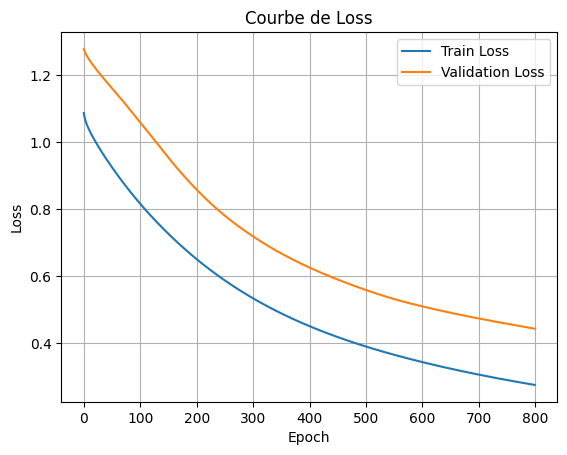

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from keras.models import load_model

best_model = load_model('/content/best_model_2.h5')

In [ ]:
# Appliquer le modèle pour prédire les variétés des Iris du jeu de test et stoker dans "y_test_pred"
y_test_pred=best_model.predict(x_test)

# créer un data frame df_y_test_pred
df_y_test_pred=pd.DataFrame(y_test_pred,columns=['setosa','versicolor','virginica'],index=y_test.index)
## selectionner la colonne qui a la plus grande probabilité
df_y_test_pred=df_y_test_pred.idxmax(axis="columns")
df_y_test=y_test.idxmax(axis="columns")

## concatener predictions et observées
df_y_test_pred= pd.concat([df_y_test,df_y_test_pred],keys=["obs","pred"],axis=1)
df_y_test_pred.head()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


,obs,pred
94,versicolor,versicolor
57,versicolor,versicolor
118,virginica,virginica
61,versicolor,versicolor
68,versicolor,versicolor


In [ ]:

print("Matrice de confusion:")
cm = confusion_matrix(df_y_test_pred.obs,df_y_test_pred.pred)
print(pd.DataFrame(cm))
print(metrics.classification_report(df_y_test_pred.obs, df_y_test_pred.pred, digits=3))

Matrice de confusion:
    0   1   2
0  15   0   0
1   0  13   2
2   0   2  13
              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        15
  versicolor      0.867     0.867     0.867        15
   virginica      0.867     0.867     0.867        15

    accuracy                          0.911        45
   macro avg      0.911     0.911     0.911        45
weighted avg      0.911     0.911     0.911        45



#### <font color="blue"> C) Modèle avec 1 couche cachée et 3 neurones en sortie : Setosa, Virginica et Versicolor</font>

In [ ]:
# construction du modèle
model = Sequential()
# ajouter une couche d'entrée en précisant le nombre d'input
model.add(Input(shape=(4,)))
#model.add(Dropout(.25))
# ajouter la couche de sortie composé de 1 neurone avec une fonction d'activation sigmoïde
model.add(Dense(4, activation='relu'))
#model.add(Dropout(.25))
model.add(Dense(3, activation='softmax'))

# Préciser les paramètres d'optimisation du modèle (loss, optimizer et metrics)
model.compile(loss='CategoricalCrossentropy',
              #optimizer='adam',
              metrics=[F1Score(threshold=0.5)])



In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
   'best_model_3.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)


In [ ]:
# ajustement du modèle (Enregistrer le temps CPU vs GPU)
#model.fit(x_train, y_train, batch_size=70, epochs=100, verbose=0)
history = model.fit(x_train, y_train,validation_split=0.15, batch_size=150, epochs=800, verbose=0,callbacks=[checkpoint])



Epoch 1: val_loss improved from inf to 1.01747, saving model to best_model_3.h5



Epoch 2: val_loss improved from 1.01747 to 1.01298, saving model to best_model_3.h5



Epoch 3: val_loss improved from 1.01298 to 1.00924, saving model to best_model_3.h5



Epoch 4: val_loss improved from 1.00924 to 1.00600, saving model to best_model_3.h5



Epoch 5: val_loss improved from 1.00600 to 1.00296, saving model to best_model_3.h5



Epoch 6: val_loss improved from 1.00296 to 1.00006, saving model to best_model_3.h5



Epoch 7: val_loss improved from 1.00006 to 0.99735, saving model to best_model_3.h5



Epoch 8: val_loss improved from 0.99735 to 0.99477, saving model to best_model_3.h5



Epoch 9: val_loss improved from 0.99477 to 0.99232, saving model to best_model_3.h5



Epoch 10: val_loss improved from 0.99232 to 0.98995, saving model to best_model_3.h5



Epoch 11: val_loss improved from 0.98995 to 0.98765, saving model to best_model_3.h5



Epoch 12: val_loss improved from 0.98765 to 0.98543, saving model to best_model_3.h5



Epoch 13: val_loss improved from 0.98543 to 0.98325, saving model to best_model_3.h5



Epoch 14: val_loss improved from 0.98325 to 0.98114, saving model to best_model_3.h5



Epoch 15: val_loss improved from 0.98114 to 0.97907, saving model to best_model_3.h5



Epoch 16: val_loss improved from 0.97907 to 0.97705, saving model to best_model_3.h5



Epoch 17: val_loss improved from 0.97705 to 0.97508, saving model to best_model_3.h5



Epoch 18: val_loss improved from 0.97508 to 0.97314, saving model to best_model_3.h5



Epoch 19: val_loss improved from 0.97314 to 0.97124, saving model to best_model_3.h5



Epoch 20: val_loss improved from 0.97124 to 0.96938, saving model to best_model_3.h5



Epoch 21: val_loss improved from 0.96938 to 0.96754, saving model to best_model_3.h5



Epoch 22: val_loss improved from 0.96754 to 0.96573, saving model to best_model_3.h5



Epoch 23: val_loss improved from 0.96573 to 0.96402, saving model to best_model_3.h5



Epoch 24: val_loss improved from 0.96402 to 0.96232, saving model to best_model_3.h5



Epoch 25: val_loss improved from 0.96232 to 0.96064, saving model to best_model_3.h5



Epoch 26: val_loss improved from 0.96064 to 0.95897, saving model to best_model_3.h5



Epoch 27: val_loss improved from 0.95897 to 0.95733, saving model to best_model_3.h5



Epoch 28: val_loss improved from 0.95733 to 0.95569, saving model to best_model_3.h5



Epoch 29: val_loss improved from 0.95569 to 0.95407, saving model to best_model_3.h5



Epoch 30: val_loss improved from 0.95407 to 0.95243, saving model to best_model_3.h5



Epoch 31: val_loss improved from 0.95243 to 0.95078, saving model to best_model_3.h5



Epoch 32: val_loss improved from 0.95078 to 0.94913, saving model to best_model_3.h5



Epoch 33: val_loss improved from 0.94913 to 0.94749, saving model to best_model_3.h5



Epoch 34: val_loss improved from 0.94749 to 0.94587, saving model to best_model_3.h5



Epoch 35: val_loss improved from 0.94587 to 0.94425, saving model to best_model_3.h5



Epoch 36: val_loss improved from 0.94425 to 0.94263, saving model to best_model_3.h5



Epoch 37: val_loss improved from 0.94263 to 0.94103, saving model to best_model_3.h5



Epoch 38: val_loss improved from 0.94103 to 0.93943, saving model to best_model_3.h5



Epoch 39: val_loss improved from 0.93943 to 0.93784, saving model to best_model_3.h5



Epoch 40: val_loss improved from 0.93784 to 0.93626, saving model to best_model_3.h5



Epoch 41: val_loss improved from 0.93626 to 0.93469, saving model to best_model_3.h5



Epoch 42: val_loss improved from 0.93469 to 0.93312, saving model to best_model_3.h5



Epoch 43: val_loss improved from 0.93312 to 0.93156, saving model to best_model_3.h5



Epoch 44: val_loss improved from 0.93156 to 0.93000, saving model to best_model_3.h5



Epoch 45: val_loss improved from 0.93000 to 0.92847, saving model to best_model_3.h5



Epoch 46: val_loss improved from 0.92847 to 0.92693, saving model to best_model_3.h5



Epoch 47: val_loss improved from 0.92693 to 0.92541, saving model to best_model_3.h5



Epoch 48: val_loss improved from 0.92541 to 0.92389, saving model to best_model_3.h5



Epoch 49: val_loss improved from 0.92389 to 0.92242, saving model to best_model_3.h5



Epoch 50: val_loss improved from 0.92242 to 0.92094, saving model to best_model_3.h5



Epoch 51: val_loss improved from 0.92094 to 0.91947, saving model to best_model_3.h5



Epoch 52: val_loss improved from 0.91947 to 0.91800, saving model to best_model_3.h5



Epoch 53: val_loss improved from 0.91800 to 0.91653, saving model to best_model_3.h5



Epoch 54: val_loss improved from 0.91653 to 0.91507, saving model to best_model_3.h5



Epoch 55: val_loss improved from 0.91507 to 0.91370, saving model to best_model_3.h5



Epoch 56: val_loss improved from 0.91370 to 0.91232, saving model to best_model_3.h5



Epoch 57: val_loss improved from 0.91232 to 0.91093, saving model to best_model_3.h5



Epoch 58: val_loss improved from 0.91093 to 0.90954, saving model to best_model_3.h5



Epoch 59: val_loss improved from 0.90954 to 0.90816, saving model to best_model_3.h5



Epoch 60: val_loss improved from 0.90816 to 0.90678, saving model to best_model_3.h5



Epoch 61: val_loss improved from 0.90678 to 0.90539, saving model to best_model_3.h5



Epoch 62: val_loss improved from 0.90539 to 0.90400, saving model to best_model_3.h5



Epoch 63: val_loss improved from 0.90400 to 0.90261, saving model to best_model_3.h5



Epoch 64: val_loss improved from 0.90261 to 0.90122, saving model to best_model_3.h5



Epoch 65: val_loss improved from 0.90122 to 0.89984, saving model to best_model_3.h5



Epoch 66: val_loss improved from 0.89984 to 0.89846, saving model to best_model_3.h5



Epoch 67: val_loss improved from 0.89846 to 0.89707, saving model to best_model_3.h5



Epoch 68: val_loss improved from 0.89707 to 0.89569, saving model to best_model_3.h5



Epoch 69: val_loss improved from 0.89569 to 0.89431, saving model to best_model_3.h5



Epoch 70: val_loss improved from 0.89431 to 0.89293, saving model to best_model_3.h5



Epoch 71: val_loss improved from 0.89293 to 0.89155, saving model to best_model_3.h5



Epoch 72: val_loss improved from 0.89155 to 0.89017, saving model to best_model_3.h5



Epoch 73: val_loss improved from 0.89017 to 0.88879, saving model to best_model_3.h5



Epoch 74: val_loss improved from 0.88879 to 0.88742, saving model to best_model_3.h5



Epoch 75: val_loss improved from 0.88742 to 0.88607, saving model to best_model_3.h5



Epoch 76: val_loss improved from 0.88607 to 0.88472, saving model to best_model_3.h5



Epoch 77: val_loss improved from 0.88472 to 0.88337, saving model to best_model_3.h5



Epoch 78: val_loss improved from 0.88337 to 0.88202, saving model to best_model_3.h5



Epoch 79: val_loss improved from 0.88202 to 0.88066, saving model to best_model_3.h5



Epoch 80: val_loss improved from 0.88066 to 0.87929, saving model to best_model_3.h5



Epoch 81: val_loss improved from 0.87929 to 0.87792, saving model to best_model_3.h5



Epoch 82: val_loss improved from 0.87792 to 0.87655, saving model to best_model_3.h5



Epoch 83: val_loss improved from 0.87655 to 0.87519, saving model to best_model_3.h5



Epoch 84: val_loss improved from 0.87519 to 0.87381, saving model to best_model_3.h5



Epoch 85: val_loss improved from 0.87381 to 0.87244, saving model to best_model_3.h5



Epoch 86: val_loss improved from 0.87244 to 0.87107, saving model to best_model_3.h5



Epoch 87: val_loss improved from 0.87107 to 0.86969, saving model to best_model_3.h5



Epoch 88: val_loss improved from 0.86969 to 0.86830, saving model to best_model_3.h5



Epoch 89: val_loss improved from 0.86830 to 0.86691, saving model to best_model_3.h5



Epoch 90: val_loss improved from 0.86691 to 0.86551, saving model to best_model_3.h5



Epoch 91: val_loss improved from 0.86551 to 0.86413, saving model to best_model_3.h5



Epoch 92: val_loss improved from 0.86413 to 0.86290, saving model to best_model_3.h5



Epoch 93: val_loss improved from 0.86290 to 0.86164, saving model to best_model_3.h5



Epoch 94: val_loss improved from 0.86164 to 0.86035, saving model to best_model_3.h5



Epoch 95: val_loss improved from 0.86035 to 0.85906, saving model to best_model_3.h5



Epoch 96: val_loss improved from 0.85906 to 0.85776, saving model to best_model_3.h5



Epoch 97: val_loss improved from 0.85776 to 0.85642, saving model to best_model_3.h5



Epoch 98: val_loss improved from 0.85642 to 0.85507, saving model to best_model_3.h5



Epoch 99: val_loss improved from 0.85507 to 0.85373, saving model to best_model_3.h5



Epoch 100: val_loss improved from 0.85373 to 0.85235, saving model to best_model_3.h5



Epoch 101: val_loss improved from 0.85235 to 0.85097, saving model to best_model_3.h5



Epoch 102: val_loss improved from 0.85097 to 0.84959, saving model to best_model_3.h5



Epoch 103: val_loss improved from 0.84959 to 0.84821, saving model to best_model_3.h5



Epoch 104: val_loss improved from 0.84821 to 0.84684, saving model to best_model_3.h5



Epoch 105: val_loss improved from 0.84684 to 0.84547, saving model to best_model_3.h5



Epoch 106: val_loss improved from 0.84547 to 0.84411, saving model to best_model_3.h5



Epoch 107: val_loss improved from 0.84411 to 0.84275, saving model to best_model_3.h5



Epoch 108: val_loss improved from 0.84275 to 0.84138, saving model to best_model_3.h5



Epoch 109: val_loss improved from 0.84138 to 0.84003, saving model to best_model_3.h5



Epoch 110: val_loss improved from 0.84003 to 0.83867, saving model to best_model_3.h5



Epoch 111: val_loss improved from 0.83867 to 0.83732, saving model to best_model_3.h5



Epoch 112: val_loss improved from 0.83732 to 0.83598, saving model to best_model_3.h5



Epoch 113: val_loss improved from 0.83598 to 0.83463, saving model to best_model_3.h5



Epoch 114: val_loss improved from 0.83463 to 0.83329, saving model to best_model_3.h5



Epoch 115: val_loss improved from 0.83329 to 0.83195, saving model to best_model_3.h5



Epoch 116: val_loss improved from 0.83195 to 0.83060, saving model to best_model_3.h5



Epoch 117: val_loss improved from 0.83060 to 0.82926, saving model to best_model_3.h5



Epoch 118: val_loss improved from 0.82926 to 0.82792, saving model to best_model_3.h5



Epoch 119: val_loss improved from 0.82792 to 0.82658, saving model to best_model_3.h5



Epoch 120: val_loss improved from 0.82658 to 0.82524, saving model to best_model_3.h5



Epoch 121: val_loss improved from 0.82524 to 0.82390, saving model to best_model_3.h5



Epoch 122: val_loss improved from 0.82390 to 0.82256, saving model to best_model_3.h5



Epoch 123: val_loss improved from 0.82256 to 0.82122, saving model to best_model_3.h5



Epoch 124: val_loss improved from 0.82122 to 0.81990, saving model to best_model_3.h5



Epoch 125: val_loss improved from 0.81990 to 0.81857, saving model to best_model_3.h5



Epoch 126: val_loss improved from 0.81857 to 0.81726, saving model to best_model_3.h5



Epoch 127: val_loss improved from 0.81726 to 0.81594, saving model to best_model_3.h5



Epoch 128: val_loss improved from 0.81594 to 0.81462, saving model to best_model_3.h5



Epoch 129: val_loss improved from 0.81462 to 0.81330, saving model to best_model_3.h5



Epoch 130: val_loss improved from 0.81330 to 0.81215, saving model to best_model_3.h5



Epoch 131: val_loss improved from 0.81215 to 0.81097, saving model to best_model_3.h5



Epoch 132: val_loss improved from 0.81097 to 0.80976, saving model to best_model_3.h5



Epoch 133: val_loss improved from 0.80976 to 0.80854, saving model to best_model_3.h5



Epoch 134: val_loss improved from 0.80854 to 0.80731, saving model to best_model_3.h5



Epoch 135: val_loss improved from 0.80731 to 0.80606, saving model to best_model_3.h5



Epoch 136: val_loss improved from 0.80606 to 0.80480, saving model to best_model_3.h5



Epoch 137: val_loss improved from 0.80480 to 0.80355, saving model to best_model_3.h5



Epoch 138: val_loss improved from 0.80355 to 0.80223, saving model to best_model_3.h5



Epoch 139: val_loss improved from 0.80223 to 0.80092, saving model to best_model_3.h5



Epoch 140: val_loss improved from 0.80092 to 0.79963, saving model to best_model_3.h5



Epoch 141: val_loss improved from 0.79963 to 0.79835, saving model to best_model_3.h5



Epoch 142: val_loss improved from 0.79835 to 0.79706, saving model to best_model_3.h5



Epoch 143: val_loss improved from 0.79706 to 0.79579, saving model to best_model_3.h5



Epoch 144: val_loss improved from 0.79579 to 0.79452, saving model to best_model_3.h5



Epoch 145: val_loss improved from 0.79452 to 0.79327, saving model to best_model_3.h5



Epoch 146: val_loss improved from 0.79327 to 0.79203, saving model to best_model_3.h5



Epoch 147: val_loss improved from 0.79203 to 0.79077, saving model to best_model_3.h5



Epoch 148: val_loss improved from 0.79077 to 0.78952, saving model to best_model_3.h5



Epoch 149: val_loss improved from 0.78952 to 0.78835, saving model to best_model_3.h5



Epoch 150: val_loss improved from 0.78835 to 0.78718, saving model to best_model_3.h5



Epoch 151: val_loss improved from 0.78718 to 0.78600, saving model to best_model_3.h5



Epoch 152: val_loss improved from 0.78600 to 0.78481, saving model to best_model_3.h5



Epoch 153: val_loss improved from 0.78481 to 0.78362, saving model to best_model_3.h5



Epoch 154: val_loss improved from 0.78362 to 0.78243, saving model to best_model_3.h5



Epoch 155: val_loss improved from 0.78243 to 0.78123, saving model to best_model_3.h5



Epoch 156: val_loss improved from 0.78123 to 0.78010, saving model to best_model_3.h5



Epoch 157: val_loss improved from 0.78010 to 0.77899, saving model to best_model_3.h5



Epoch 158: val_loss improved from 0.77899 to 0.77788, saving model to best_model_3.h5



Epoch 159: val_loss improved from 0.77788 to 0.77678, saving model to best_model_3.h5



Epoch 160: val_loss improved from 0.77678 to 0.77567, saving model to best_model_3.h5



Epoch 161: val_loss improved from 0.77567 to 0.77456, saving model to best_model_3.h5



Epoch 162: val_loss improved from 0.77456 to 0.77345, saving model to best_model_3.h5



Epoch 163: val_loss improved from 0.77345 to 0.77233, saving model to best_model_3.h5



Epoch 164: val_loss improved from 0.77233 to 0.77122, saving model to best_model_3.h5



Epoch 165: val_loss improved from 0.77122 to 0.77012, saving model to best_model_3.h5



Epoch 166: val_loss improved from 0.77012 to 0.76900, saving model to best_model_3.h5



Epoch 167: val_loss improved from 0.76900 to 0.76789, saving model to best_model_3.h5



Epoch 168: val_loss improved from 0.76789 to 0.76679, saving model to best_model_3.h5



Epoch 169: val_loss improved from 0.76679 to 0.76567, saving model to best_model_3.h5



Epoch 170: val_loss improved from 0.76567 to 0.76456, saving model to best_model_3.h5



Epoch 171: val_loss improved from 0.76456 to 0.76345, saving model to best_model_3.h5



Epoch 172: val_loss improved from 0.76345 to 0.76235, saving model to best_model_3.h5



Epoch 173: val_loss improved from 0.76235 to 0.76125, saving model to best_model_3.h5



Epoch 174: val_loss improved from 0.76125 to 0.76016, saving model to best_model_3.h5



Epoch 175: val_loss improved from 0.76016 to 0.75908, saving model to best_model_3.h5



Epoch 176: val_loss improved from 0.75908 to 0.75800, saving model to best_model_3.h5



Epoch 177: val_loss improved from 0.75800 to 0.75692, saving model to best_model_3.h5



Epoch 178: val_loss improved from 0.75692 to 0.75584, saving model to best_model_3.h5



Epoch 179: val_loss improved from 0.75584 to 0.75477, saving model to best_model_3.h5



Epoch 180: val_loss improved from 0.75477 to 0.75370, saving model to best_model_3.h5



Epoch 181: val_loss improved from 0.75370 to 0.75272, saving model to best_model_3.h5



Epoch 182: val_loss improved from 0.75272 to 0.75181, saving model to best_model_3.h5



Epoch 183: val_loss improved from 0.75181 to 0.75090, saving model to best_model_3.h5



Epoch 184: val_loss improved from 0.75090 to 0.75000, saving model to best_model_3.h5



Epoch 185: val_loss improved from 0.75000 to 0.74906, saving model to best_model_3.h5



Epoch 186: val_loss improved from 0.74906 to 0.74812, saving model to best_model_3.h5



Epoch 187: val_loss improved from 0.74812 to 0.74719, saving model to best_model_3.h5



Epoch 188: val_loss improved from 0.74719 to 0.74627, saving model to best_model_3.h5



Epoch 189: val_loss improved from 0.74627 to 0.74535, saving model to best_model_3.h5



Epoch 190: val_loss improved from 0.74535 to 0.74443, saving model to best_model_3.h5



Epoch 191: val_loss improved from 0.74443 to 0.74351, saving model to best_model_3.h5



Epoch 192: val_loss improved from 0.74351 to 0.74259, saving model to best_model_3.h5



Epoch 193: val_loss improved from 0.74259 to 0.74167, saving model to best_model_3.h5



Epoch 194: val_loss improved from 0.74167 to 0.74071, saving model to best_model_3.h5



Epoch 195: val_loss improved from 0.74071 to 0.73976, saving model to best_model_3.h5



Epoch 196: val_loss improved from 0.73976 to 0.73881, saving model to best_model_3.h5



Epoch 197: val_loss improved from 0.73881 to 0.73788, saving model to best_model_3.h5



Epoch 198: val_loss improved from 0.73788 to 0.73694, saving model to best_model_3.h5



Epoch 199: val_loss improved from 0.73694 to 0.73602, saving model to best_model_3.h5



Epoch 200: val_loss improved from 0.73602 to 0.73510, saving model to best_model_3.h5



Epoch 201: val_loss improved from 0.73510 to 0.73418, saving model to best_model_3.h5



Epoch 202: val_loss improved from 0.73418 to 0.73327, saving model to best_model_3.h5



Epoch 203: val_loss improved from 0.73327 to 0.73236, saving model to best_model_3.h5



Epoch 204: val_loss improved from 0.73236 to 0.73146, saving model to best_model_3.h5



Epoch 205: val_loss improved from 0.73146 to 0.73056, saving model to best_model_3.h5



Epoch 206: val_loss improved from 0.73056 to 0.72966, saving model to best_model_3.h5



Epoch 207: val_loss improved from 0.72966 to 0.72871, saving model to best_model_3.h5



Epoch 208: val_loss improved from 0.72871 to 0.72768, saving model to best_model_3.h5



Epoch 209: val_loss improved from 0.72768 to 0.72663, saving model to best_model_3.h5



Epoch 210: val_loss improved from 0.72663 to 0.72560, saving model to best_model_3.h5



Epoch 211: val_loss improved from 0.72560 to 0.72457, saving model to best_model_3.h5



Epoch 212: val_loss improved from 0.72457 to 0.72354, saving model to best_model_3.h5



Epoch 213: val_loss improved from 0.72354 to 0.72252, saving model to best_model_3.h5



Epoch 214: val_loss improved from 0.72252 to 0.72150, saving model to best_model_3.h5



Epoch 215: val_loss improved from 0.72150 to 0.72049, saving model to best_model_3.h5



Epoch 216: val_loss improved from 0.72049 to 0.71948, saving model to best_model_3.h5



Epoch 217: val_loss improved from 0.71948 to 0.71847, saving model to best_model_3.h5



Epoch 218: val_loss improved from 0.71847 to 0.71746, saving model to best_model_3.h5



Epoch 219: val_loss improved from 0.71746 to 0.71644, saving model to best_model_3.h5



Epoch 220: val_loss improved from 0.71644 to 0.71543, saving model to best_model_3.h5



Epoch 221: val_loss improved from 0.71543 to 0.71424, saving model to best_model_3.h5



Epoch 222: val_loss improved from 0.71424 to 0.71304, saving model to best_model_3.h5



Epoch 223: val_loss improved from 0.71304 to 0.71206, saving model to best_model_3.h5



Epoch 224: val_loss improved from 0.71206 to 0.71085, saving model to best_model_3.h5



Epoch 225: val_loss improved from 0.71085 to 0.70949, saving model to best_model_3.h5



Epoch 226: val_loss improved from 0.70949 to 0.70855, saving model to best_model_3.h5



Epoch 227: val_loss improved from 0.70855 to 0.70722, saving model to best_model_3.h5



Epoch 228: val_loss improved from 0.70722 to 0.70588, saving model to best_model_3.h5



Epoch 229: val_loss improved from 0.70588 to 0.70453, saving model to best_model_3.h5



Epoch 230: val_loss improved from 0.70453 to 0.70344, saving model to best_model_3.h5



Epoch 231: val_loss improved from 0.70344 to 0.70210, saving model to best_model_3.h5



Epoch 232: val_loss improved from 0.70210 to 0.70073, saving model to best_model_3.h5



Epoch 233: val_loss improved from 0.70073 to 0.69947, saving model to best_model_3.h5



Epoch 234: val_loss improved from 0.69947 to 0.69809, saving model to best_model_3.h5



Epoch 235: val_loss improved from 0.69809 to 0.69669, saving model to best_model_3.h5



Epoch 236: val_loss improved from 0.69669 to 0.69530, saving model to best_model_3.h5



Epoch 237: val_loss improved from 0.69530 to 0.69425, saving model to best_model_3.h5



Epoch 238: val_loss improved from 0.69425 to 0.69288, saving model to best_model_3.h5



Epoch 239: val_loss improved from 0.69288 to 0.69152, saving model to best_model_3.h5



Epoch 240: val_loss improved from 0.69152 to 0.69016, saving model to best_model_3.h5



Epoch 241: val_loss improved from 0.69016 to 0.68882, saving model to best_model_3.h5



Epoch 242: val_loss improved from 0.68882 to 0.68748, saving model to best_model_3.h5



Epoch 243: val_loss improved from 0.68748 to 0.68615, saving model to best_model_3.h5



Epoch 244: val_loss improved from 0.68615 to 0.68483, saving model to best_model_3.h5



Epoch 245: val_loss improved from 0.68483 to 0.68351, saving model to best_model_3.h5



Epoch 246: val_loss improved from 0.68351 to 0.68212, saving model to best_model_3.h5



Epoch 247: val_loss improved from 0.68212 to 0.68081, saving model to best_model_3.h5



Epoch 248: val_loss improved from 0.68081 to 0.67945, saving model to best_model_3.h5



Epoch 249: val_loss improved from 0.67945 to 0.67816, saving model to best_model_3.h5



Epoch 250: val_loss improved from 0.67816 to 0.67682, saving model to best_model_3.h5



Epoch 251: val_loss improved from 0.67682 to 0.67548, saving model to best_model_3.h5



Epoch 252: val_loss improved from 0.67548 to 0.67421, saving model to best_model_3.h5



Epoch 253: val_loss improved from 0.67421 to 0.67286, saving model to best_model_3.h5



Epoch 254: val_loss improved from 0.67286 to 0.67153, saving model to best_model_3.h5



Epoch 255: val_loss improved from 0.67153 to 0.67014, saving model to best_model_3.h5



Epoch 256: val_loss improved from 0.67014 to 0.66883, saving model to best_model_3.h5



Epoch 257: val_loss improved from 0.66883 to 0.66742, saving model to best_model_3.h5



Epoch 258: val_loss improved from 0.66742 to 0.66603, saving model to best_model_3.h5



Epoch 259: val_loss improved from 0.66603 to 0.66469, saving model to best_model_3.h5



Epoch 260: val_loss improved from 0.66469 to 0.66323, saving model to best_model_3.h5



Epoch 261: val_loss improved from 0.66323 to 0.66191, saving model to best_model_3.h5



Epoch 262: val_loss improved from 0.66191 to 0.66050, saving model to best_model_3.h5



Epoch 263: val_loss improved from 0.66050 to 0.65919, saving model to best_model_3.h5



Epoch 264: val_loss improved from 0.65919 to 0.65781, saving model to best_model_3.h5



Epoch 265: val_loss improved from 0.65781 to 0.65653, saving model to best_model_3.h5



Epoch 266: val_loss improved from 0.65653 to 0.65509, saving model to best_model_3.h5



Epoch 267: val_loss improved from 0.65509 to 0.65374, saving model to best_model_3.h5



Epoch 268: val_loss improved from 0.65374 to 0.65226, saving model to best_model_3.h5



Epoch 269: val_loss improved from 0.65226 to 0.65083, saving model to best_model_3.h5



Epoch 270: val_loss improved from 0.65083 to 0.64938, saving model to best_model_3.h5



Epoch 271: val_loss improved from 0.64938 to 0.64786, saving model to best_model_3.h5



Epoch 272: val_loss improved from 0.64786 to 0.64643, saving model to best_model_3.h5



Epoch 273: val_loss improved from 0.64643 to 0.64494, saving model to best_model_3.h5



Epoch 274: val_loss improved from 0.64494 to 0.64348, saving model to best_model_3.h5



Epoch 275: val_loss improved from 0.64348 to 0.64208, saving model to best_model_3.h5



Epoch 276: val_loss improved from 0.64208 to 0.64064, saving model to best_model_3.h5



Epoch 277: val_loss improved from 0.64064 to 0.63921, saving model to best_model_3.h5



Epoch 278: val_loss improved from 0.63921 to 0.63784, saving model to best_model_3.h5



Epoch 279: val_loss improved from 0.63784 to 0.63637, saving model to best_model_3.h5



Epoch 280: val_loss improved from 0.63637 to 0.63498, saving model to best_model_3.h5



Epoch 281: val_loss improved from 0.63498 to 0.63362, saving model to best_model_3.h5



Epoch 282: val_loss improved from 0.63362 to 0.63219, saving model to best_model_3.h5



Epoch 283: val_loss improved from 0.63219 to 0.63077, saving model to best_model_3.h5



Epoch 284: val_loss improved from 0.63077 to 0.62944, saving model to best_model_3.h5



Epoch 285: val_loss improved from 0.62944 to 0.62803, saving model to best_model_3.h5



Epoch 286: val_loss improved from 0.62803 to 0.62663, saving model to best_model_3.h5



Epoch 287: val_loss improved from 0.62663 to 0.62530, saving model to best_model_3.h5



Epoch 288: val_loss improved from 0.62530 to 0.62397, saving model to best_model_3.h5



Epoch 289: val_loss improved from 0.62397 to 0.62256, saving model to best_model_3.h5



Epoch 290: val_loss improved from 0.62256 to 0.62119, saving model to best_model_3.h5



Epoch 291: val_loss improved from 0.62119 to 0.61980, saving model to best_model_3.h5



Epoch 292: val_loss improved from 0.61980 to 0.61847, saving model to best_model_3.h5



Epoch 293: val_loss improved from 0.61847 to 0.61708, saving model to best_model_3.h5



Epoch 294: val_loss improved from 0.61708 to 0.61571, saving model to best_model_3.h5



Epoch 295: val_loss improved from 0.61571 to 0.61431, saving model to best_model_3.h5



Epoch 296: val_loss improved from 0.61431 to 0.61300, saving model to best_model_3.h5



Epoch 297: val_loss improved from 0.61300 to 0.61155, saving model to best_model_3.h5



Epoch 298: val_loss improved from 0.61155 to 0.61020, saving model to best_model_3.h5



Epoch 299: val_loss improved from 0.61020 to 0.60877, saving model to best_model_3.h5



Epoch 300: val_loss improved from 0.60877 to 0.60738, saving model to best_model_3.h5



Epoch 301: val_loss improved from 0.60738 to 0.60596, saving model to best_model_3.h5



Epoch 302: val_loss improved from 0.60596 to 0.60456, saving model to best_model_3.h5



Epoch 303: val_loss improved from 0.60456 to 0.60319, saving model to best_model_3.h5



Epoch 304: val_loss improved from 0.60319 to 0.60179, saving model to best_model_3.h5



Epoch 305: val_loss improved from 0.60179 to 0.60041, saving model to best_model_3.h5



Epoch 306: val_loss improved from 0.60041 to 0.59911, saving model to best_model_3.h5



Epoch 307: val_loss improved from 0.59911 to 0.59772, saving model to best_model_3.h5



Epoch 308: val_loss improved from 0.59772 to 0.59636, saving model to best_model_3.h5



Epoch 309: val_loss improved from 0.59636 to 0.59498, saving model to best_model_3.h5



Epoch 310: val_loss improved from 0.59498 to 0.59360, saving model to best_model_3.h5



Epoch 311: val_loss improved from 0.59360 to 0.59223, saving model to best_model_3.h5



Epoch 312: val_loss improved from 0.59223 to 0.59088, saving model to best_model_3.h5



Epoch 313: val_loss improved from 0.59088 to 0.58945, saving model to best_model_3.h5



Epoch 314: val_loss improved from 0.58945 to 0.58804, saving model to best_model_3.h5



Epoch 315: val_loss improved from 0.58804 to 0.58663, saving model to best_model_3.h5



Epoch 316: val_loss improved from 0.58663 to 0.58525, saving model to best_model_3.h5



Epoch 317: val_loss improved from 0.58525 to 0.58387, saving model to best_model_3.h5



Epoch 318: val_loss improved from 0.58387 to 0.58249, saving model to best_model_3.h5



Epoch 319: val_loss improved from 0.58249 to 0.58112, saving model to best_model_3.h5



Epoch 320: val_loss improved from 0.58112 to 0.57976, saving model to best_model_3.h5



Epoch 321: val_loss improved from 0.57976 to 0.57840, saving model to best_model_3.h5



Epoch 322: val_loss improved from 0.57840 to 0.57704, saving model to best_model_3.h5



Epoch 323: val_loss improved from 0.57704 to 0.57568, saving model to best_model_3.h5



Epoch 324: val_loss improved from 0.57568 to 0.57433, saving model to best_model_3.h5



Epoch 325: val_loss improved from 0.57433 to 0.57299, saving model to best_model_3.h5



Epoch 326: val_loss improved from 0.57299 to 0.57165, saving model to best_model_3.h5



Epoch 327: val_loss improved from 0.57165 to 0.57030, saving model to best_model_3.h5



Epoch 328: val_loss improved from 0.57030 to 0.56896, saving model to best_model_3.h5



Epoch 329: val_loss improved from 0.56896 to 0.56762, saving model to best_model_3.h5



Epoch 330: val_loss improved from 0.56762 to 0.56620, saving model to best_model_3.h5



Epoch 331: val_loss improved from 0.56620 to 0.56487, saving model to best_model_3.h5



Epoch 332: val_loss improved from 0.56487 to 0.56354, saving model to best_model_3.h5



Epoch 333: val_loss improved from 0.56354 to 0.56221, saving model to best_model_3.h5



Epoch 334: val_loss improved from 0.56221 to 0.56044, saving model to best_model_3.h5



Epoch 335: val_loss improved from 0.56044 to 0.55880, saving model to best_model_3.h5



Epoch 336: val_loss improved from 0.55880 to 0.55720, saving model to best_model_3.h5



Epoch 337: val_loss improved from 0.55720 to 0.55563, saving model to best_model_3.h5



Epoch 338: val_loss improved from 0.55563 to 0.55412, saving model to best_model_3.h5



Epoch 339: val_loss improved from 0.55412 to 0.55232, saving model to best_model_3.h5



Epoch 340: val_loss improved from 0.55232 to 0.55052, saving model to best_model_3.h5



Epoch 341: val_loss improved from 0.55052 to 0.54886, saving model to best_model_3.h5



Epoch 342: val_loss improved from 0.54886 to 0.54723, saving model to best_model_3.h5



Epoch 343: val_loss improved from 0.54723 to 0.54564, saving model to best_model_3.h5



Epoch 344: val_loss improved from 0.54564 to 0.54398, saving model to best_model_3.h5



Epoch 345: val_loss improved from 0.54398 to 0.54242, saving model to best_model_3.h5



Epoch 346: val_loss improved from 0.54242 to 0.54088, saving model to best_model_3.h5



Epoch 347: val_loss improved from 0.54088 to 0.53935, saving model to best_model_3.h5



Epoch 348: val_loss improved from 0.53935 to 0.53783, saving model to best_model_3.h5



Epoch 349: val_loss improved from 0.53783 to 0.53624, saving model to best_model_3.h5



Epoch 350: val_loss improved from 0.53624 to 0.53474, saving model to best_model_3.h5



Epoch 351: val_loss improved from 0.53474 to 0.53325, saving model to best_model_3.h5



Epoch 352: val_loss improved from 0.53325 to 0.53210, saving model to best_model_3.h5



Epoch 353: val_loss improved from 0.53210 to 0.53060, saving model to best_model_3.h5



Epoch 354: val_loss improved from 0.53060 to 0.52944, saving model to best_model_3.h5



Epoch 355: val_loss improved from 0.52944 to 0.52787, saving model to best_model_3.h5



Epoch 356: val_loss improved from 0.52787 to 0.52671, saving model to best_model_3.h5



Epoch 357: val_loss improved from 0.52671 to 0.52553, saving model to best_model_3.h5



Epoch 358: val_loss improved from 0.52553 to 0.52403, saving model to best_model_3.h5



Epoch 359: val_loss improved from 0.52403 to 0.52285, saving model to best_model_3.h5



Epoch 360: val_loss improved from 0.52285 to 0.52134, saving model to best_model_3.h5



Epoch 361: val_loss improved from 0.52134 to 0.52016, saving model to best_model_3.h5



Epoch 362: val_loss improved from 0.52016 to 0.51890, saving model to best_model_3.h5



Epoch 363: val_loss improved from 0.51890 to 0.51770, saving model to best_model_3.h5



Epoch 364: val_loss improved from 0.51770 to 0.51619, saving model to best_model_3.h5



Epoch 365: val_loss improved from 0.51619 to 0.51499, saving model to best_model_3.h5



Epoch 366: val_loss improved from 0.51499 to 0.51366, saving model to best_model_3.h5



Epoch 367: val_loss improved from 0.51366 to 0.51234, saving model to best_model_3.h5



Epoch 368: val_loss improved from 0.51234 to 0.51102, saving model to best_model_3.h5



Epoch 369: val_loss improved from 0.51102 to 0.50958, saving model to best_model_3.h5



Epoch 370: val_loss improved from 0.50958 to 0.50828, saving model to best_model_3.h5



Epoch 371: val_loss improved from 0.50828 to 0.50681, saving model to best_model_3.h5



Epoch 372: val_loss improved from 0.50681 to 0.50542, saving model to best_model_3.h5



Epoch 373: val_loss improved from 0.50542 to 0.50404, saving model to best_model_3.h5



Epoch 374: val_loss improved from 0.50404 to 0.50268, saving model to best_model_3.h5



Epoch 375: val_loss improved from 0.50268 to 0.50133, saving model to best_model_3.h5



Epoch 376: val_loss improved from 0.50133 to 0.49998, saving model to best_model_3.h5



Epoch 377: val_loss improved from 0.49998 to 0.49864, saving model to best_model_3.h5



Epoch 378: val_loss improved from 0.49864 to 0.49731, saving model to best_model_3.h5



Epoch 379: val_loss improved from 0.49731 to 0.49599, saving model to best_model_3.h5



Epoch 380: val_loss improved from 0.49599 to 0.49468, saving model to best_model_3.h5



Epoch 381: val_loss improved from 0.49468 to 0.49337, saving model to best_model_3.h5



Epoch 382: val_loss improved from 0.49337 to 0.49207, saving model to best_model_3.h5



Epoch 383: val_loss improved from 0.49207 to 0.49077, saving model to best_model_3.h5



Epoch 384: val_loss improved from 0.49077 to 0.48948, saving model to best_model_3.h5



Epoch 385: val_loss improved from 0.48948 to 0.48820, saving model to best_model_3.h5



Epoch 386: val_loss improved from 0.48820 to 0.48693, saving model to best_model_3.h5



Epoch 387: val_loss improved from 0.48693 to 0.48566, saving model to best_model_3.h5



Epoch 388: val_loss improved from 0.48566 to 0.48440, saving model to best_model_3.h5



Epoch 389: val_loss improved from 0.48440 to 0.48314, saving model to best_model_3.h5



Epoch 390: val_loss improved from 0.48314 to 0.48189, saving model to best_model_3.h5



Epoch 391: val_loss improved from 0.48189 to 0.48064, saving model to best_model_3.h5



Epoch 392: val_loss improved from 0.48064 to 0.47941, saving model to best_model_3.h5



Epoch 393: val_loss improved from 0.47941 to 0.47817, saving model to best_model_3.h5



Epoch 394: val_loss improved from 0.47817 to 0.47695, saving model to best_model_3.h5



Epoch 395: val_loss improved from 0.47695 to 0.47573, saving model to best_model_3.h5



Epoch 396: val_loss improved from 0.47573 to 0.47490, saving model to best_model_3.h5



Epoch 397: val_loss improved from 0.47490 to 0.47362, saving model to best_model_3.h5



Epoch 398: val_loss improved from 0.47362 to 0.47272, saving model to best_model_3.h5



Epoch 399: val_loss improved from 0.47272 to 0.47143, saving model to best_model_3.h5



Epoch 400: val_loss improved from 0.47143 to 0.47049, saving model to best_model_3.h5



Epoch 401: val_loss improved from 0.47049 to 0.46919, saving model to best_model_3.h5



Epoch 402: val_loss improved from 0.46919 to 0.46824, saving model to best_model_3.h5



Epoch 403: val_loss improved from 0.46824 to 0.46726, saving model to best_model_3.h5



Epoch 404: val_loss improved from 0.46726 to 0.46596, saving model to best_model_3.h5



Epoch 405: val_loss improved from 0.46596 to 0.46498, saving model to best_model_3.h5



Epoch 406: val_loss improved from 0.46498 to 0.46399, saving model to best_model_3.h5



Epoch 407: val_loss improved from 0.46399 to 0.46298, saving model to best_model_3.h5



Epoch 408: val_loss improved from 0.46298 to 0.46167, saving model to best_model_3.h5



Epoch 409: val_loss improved from 0.46167 to 0.46067, saving model to best_model_3.h5



Epoch 410: val_loss improved from 0.46067 to 0.45966, saving model to best_model_3.h5



Epoch 411: val_loss improved from 0.45966 to 0.45865, saving model to best_model_3.h5



Epoch 412: val_loss improved from 0.45865 to 0.45763, saving model to best_model_3.h5



Epoch 413: val_loss improved from 0.45763 to 0.45661, saving model to best_model_3.h5



Epoch 414: val_loss improved from 0.45661 to 0.45541, saving model to best_model_3.h5



Epoch 415: val_loss improved from 0.45541 to 0.45439, saving model to best_model_3.h5



Epoch 416: val_loss improved from 0.45439 to 0.45337, saving model to best_model_3.h5



Epoch 417: val_loss improved from 0.45337 to 0.45178, saving model to best_model_3.h5



Epoch 418: val_loss improved from 0.45178 to 0.45039, saving model to best_model_3.h5



Epoch 419: val_loss improved from 0.45039 to 0.44885, saving model to best_model_3.h5



Epoch 420: val_loss improved from 0.44885 to 0.44749, saving model to best_model_3.h5



Epoch 421: val_loss improved from 0.44749 to 0.44599, saving model to best_model_3.h5



Epoch 422: val_loss improved from 0.44599 to 0.44466, saving model to best_model_3.h5



Epoch 423: val_loss improved from 0.44466 to 0.44319, saving model to best_model_3.h5



Epoch 424: val_loss improved from 0.44319 to 0.44188, saving model to best_model_3.h5



Epoch 425: val_loss improved from 0.44188 to 0.44043, saving model to best_model_3.h5



Epoch 426: val_loss improved from 0.44043 to 0.43914, saving model to best_model_3.h5



Epoch 427: val_loss improved from 0.43914 to 0.43771, saving model to best_model_3.h5



Epoch 428: val_loss improved from 0.43771 to 0.43629, saving model to best_model_3.h5



Epoch 429: val_loss improved from 0.43629 to 0.43504, saving model to best_model_3.h5



Epoch 430: val_loss improved from 0.43504 to 0.43352, saving model to best_model_3.h5



Epoch 431: val_loss improved from 0.43352 to 0.43215, saving model to best_model_3.h5



Epoch 432: val_loss improved from 0.43215 to 0.43081, saving model to best_model_3.h5



Epoch 433: val_loss improved from 0.43081 to 0.42934, saving model to best_model_3.h5



Epoch 434: val_loss improved from 0.42934 to 0.42790, saving model to best_model_3.h5



Epoch 435: val_loss improved from 0.42790 to 0.42662, saving model to best_model_3.h5



Epoch 436: val_loss improved from 0.42662 to 0.42505, saving model to best_model_3.h5



Epoch 437: val_loss improved from 0.42505 to 0.42381, saving model to best_model_3.h5



Epoch 438: val_loss improved from 0.42381 to 0.42229, saving model to best_model_3.h5



Epoch 439: val_loss improved from 0.42229 to 0.42108, saving model to best_model_3.h5



Epoch 440: val_loss improved from 0.42108 to 0.41961, saving model to best_model_3.h5



Epoch 441: val_loss improved from 0.41961 to 0.41843, saving model to best_model_3.h5



Epoch 442: val_loss improved from 0.41843 to 0.41700, saving model to best_model_3.h5



Epoch 443: val_loss improved from 0.41700 to 0.41559, saving model to best_model_3.h5



Epoch 444: val_loss improved from 0.41559 to 0.41419, saving model to best_model_3.h5



Epoch 445: val_loss improved from 0.41419 to 0.41307, saving model to best_model_3.h5



Epoch 446: val_loss improved from 0.41307 to 0.41170, saving model to best_model_3.h5



Epoch 447: val_loss improved from 0.41170 to 0.41037, saving model to best_model_3.h5



Epoch 448: val_loss improved from 0.41037 to 0.40904, saving model to best_model_3.h5



Epoch 449: val_loss improved from 0.40904 to 0.40782, saving model to best_model_3.h5



Epoch 450: val_loss improved from 0.40782 to 0.40662, saving model to best_model_3.h5



Epoch 451: val_loss improved from 0.40662 to 0.40521, saving model to best_model_3.h5



Epoch 452: val_loss improved from 0.40521 to 0.40404, saving model to best_model_3.h5



Epoch 453: val_loss improved from 0.40404 to 0.40288, saving model to best_model_3.h5



Epoch 454: val_loss improved from 0.40288 to 0.40151, saving model to best_model_3.h5



Epoch 455: val_loss improved from 0.40151 to 0.39962, saving model to best_model_3.h5



Epoch 456: val_loss improved from 0.39962 to 0.39794, saving model to best_model_3.h5



Epoch 457: val_loss improved from 0.39794 to 0.39629, saving model to best_model_3.h5



Epoch 458: val_loss improved from 0.39629 to 0.39487, saving model to best_model_3.h5



Epoch 459: val_loss improved from 0.39487 to 0.39352, saving model to best_model_3.h5



Epoch 460: val_loss improved from 0.39352 to 0.39261, saving model to best_model_3.h5



Epoch 461: val_loss improved from 0.39261 to 0.39127, saving model to best_model_3.h5



Epoch 462: val_loss improved from 0.39127 to 0.39029, saving model to best_model_3.h5



Epoch 463: val_loss improved from 0.39029 to 0.38912, saving model to best_model_3.h5



Epoch 464: val_loss improved from 0.38912 to 0.38818, saving model to best_model_3.h5



Epoch 465: val_loss improved from 0.38818 to 0.38703, saving model to best_model_3.h5



Epoch 466: val_loss improved from 0.38703 to 0.38610, saving model to best_model_3.h5



Epoch 467: val_loss improved from 0.38610 to 0.38485, saving model to best_model_3.h5



Epoch 468: val_loss improved from 0.38485 to 0.38395, saving model to best_model_3.h5



Epoch 469: val_loss improved from 0.38395 to 0.38272, saving model to best_model_3.h5



Epoch 470: val_loss improved from 0.38272 to 0.38198, saving model to best_model_3.h5



Epoch 471: val_loss improved from 0.38198 to 0.38091, saving model to best_model_3.h5



Epoch 472: val_loss improved from 0.38091 to 0.37991, saving model to best_model_3.h5



Epoch 473: val_loss improved from 0.37991 to 0.37886, saving model to best_model_3.h5



Epoch 474: val_loss improved from 0.37886 to 0.37789, saving model to best_model_3.h5



Epoch 475: val_loss improved from 0.37789 to 0.37687, saving model to best_model_3.h5



Epoch 476: val_loss improved from 0.37687 to 0.37592, saving model to best_model_3.h5



Epoch 477: val_loss improved from 0.37592 to 0.37492, saving model to best_model_3.h5



Epoch 478: val_loss improved from 0.37492 to 0.37400, saving model to best_model_3.h5



Epoch 479: val_loss improved from 0.37400 to 0.37302, saving model to best_model_3.h5



Epoch 480: val_loss improved from 0.37302 to 0.37211, saving model to best_model_3.h5



Epoch 481: val_loss improved from 0.37211 to 0.37115, saving model to best_model_3.h5



Epoch 482: val_loss improved from 0.37115 to 0.37007, saving model to best_model_3.h5



Epoch 483: val_loss improved from 0.37007 to 0.36948, saving model to best_model_3.h5



Epoch 484: val_loss improved from 0.36948 to 0.36839, saving model to best_model_3.h5



Epoch 485: val_loss improved from 0.36839 to 0.36733, saving model to best_model_3.h5



Epoch 486: val_loss improved from 0.36733 to 0.36675, saving model to best_model_3.h5



Epoch 487: val_loss improved from 0.36675 to 0.36569, saving model to best_model_3.h5



Epoch 488: val_loss improved from 0.36569 to 0.36478, saving model to best_model_3.h5



Epoch 489: val_loss improved from 0.36478 to 0.36405, saving model to best_model_3.h5



Epoch 490: val_loss improved from 0.36405 to 0.36301, saving model to best_model_3.h5



Epoch 491: val_loss improved from 0.36301 to 0.36211, saving model to best_model_3.h5



Epoch 492: val_loss improved from 0.36211 to 0.36140, saving model to best_model_3.h5



Epoch 493: val_loss improved from 0.36140 to 0.36037, saving model to best_model_3.h5



Epoch 494: val_loss improved from 0.36037 to 0.35949, saving model to best_model_3.h5



Epoch 495: val_loss improved from 0.35949 to 0.35846, saving model to best_model_3.h5



Epoch 496: val_loss improved from 0.35846 to 0.35778, saving model to best_model_3.h5



Epoch 497: val_loss improved from 0.35778 to 0.35691, saving model to best_model_3.h5



Epoch 498: val_loss improved from 0.35691 to 0.35590, saving model to best_model_3.h5



Epoch 499: val_loss improved from 0.35590 to 0.35521, saving model to best_model_3.h5



Epoch 500: val_loss improved from 0.35521 to 0.35421, saving model to best_model_3.h5



Epoch 501: val_loss improved from 0.35421 to 0.35337, saving model to best_model_3.h5



Epoch 502: val_loss improved from 0.35337 to 0.35238, saving model to best_model_3.h5



Epoch 503: val_loss improved from 0.35238 to 0.35172, saving model to best_model_3.h5



Epoch 504: val_loss improved from 0.35172 to 0.35074, saving model to best_model_3.h5



Epoch 505: val_loss improved from 0.35074 to 0.34992, saving model to best_model_3.h5



Epoch 506: val_loss improved from 0.34992 to 0.34910, saving model to best_model_3.h5



Epoch 507: val_loss improved from 0.34910 to 0.34813, saving model to best_model_3.h5



Epoch 508: val_loss improved from 0.34813 to 0.34750, saving model to best_model_3.h5



Epoch 509: val_loss improved from 0.34750 to 0.34670, saving model to best_model_3.h5



Epoch 510: val_loss improved from 0.34670 to 0.34574, saving model to best_model_3.h5



Epoch 511: val_loss improved from 0.34574 to 0.34494, saving model to best_model_3.h5



Epoch 512: val_loss improved from 0.34494 to 0.34400, saving model to best_model_3.h5



Epoch 513: val_loss improved from 0.34400 to 0.34339, saving model to best_model_3.h5



Epoch 514: val_loss improved from 0.34339 to 0.34245, saving model to best_model_3.h5



Epoch 515: val_loss improved from 0.34245 to 0.34169, saving model to best_model_3.h5



Epoch 516: val_loss improved from 0.34169 to 0.34076, saving model to best_model_3.h5



Epoch 517: val_loss improved from 0.34076 to 0.34017, saving model to best_model_3.h5



Epoch 518: val_loss improved from 0.34017 to 0.33926, saving model to best_model_3.h5



Epoch 519: val_loss improved from 0.33926 to 0.33836, saving model to best_model_3.h5



Epoch 520: val_loss improved from 0.33836 to 0.33746, saving model to best_model_3.h5



Epoch 521: val_loss improved from 0.33746 to 0.33674, saving model to best_model_3.h5



Epoch 522: val_loss improved from 0.33674 to 0.33602, saving model to best_model_3.h5



Epoch 523: val_loss improved from 0.33602 to 0.33547, saving model to best_model_3.h5



Epoch 524: val_loss improved from 0.33547 to 0.33459, saving model to best_model_3.h5



Epoch 525: val_loss improved from 0.33459 to 0.33372, saving model to best_model_3.h5



Epoch 526: val_loss improved from 0.33372 to 0.33286, saving model to best_model_3.h5



Epoch 527: val_loss improved from 0.33286 to 0.33218, saving model to best_model_3.h5



Epoch 528: val_loss improved from 0.33218 to 0.33133, saving model to best_model_3.h5



Epoch 529: val_loss improved from 0.33133 to 0.33066, saving model to best_model_3.h5



Epoch 530: val_loss improved from 0.33066 to 0.32983, saving model to best_model_3.h5



Epoch 531: val_loss improved from 0.32983 to 0.32933, saving model to best_model_3.h5



Epoch 532: val_loss improved from 0.32933 to 0.32851, saving model to best_model_3.h5



Epoch 533: val_loss improved from 0.32851 to 0.32769, saving model to best_model_3.h5



Epoch 534: val_loss improved from 0.32769 to 0.32706, saving model to best_model_3.h5



Epoch 535: val_loss improved from 0.32706 to 0.32642, saving model to best_model_3.h5



Epoch 536: val_loss improved from 0.32642 to 0.32561, saving model to best_model_3.h5



Epoch 537: val_loss improved from 0.32561 to 0.32498, saving model to best_model_3.h5



Epoch 538: val_loss improved from 0.32498 to 0.32418, saving model to best_model_3.h5



Epoch 539: val_loss improved from 0.32418 to 0.32372, saving model to best_model_3.h5



Epoch 540: val_loss improved from 0.32372 to 0.32293, saving model to best_model_3.h5



Epoch 541: val_loss improved from 0.32293 to 0.32214, saving model to best_model_3.h5



Epoch 542: val_loss improved from 0.32214 to 0.32136, saving model to best_model_3.h5



Epoch 543: val_loss improved from 0.32136 to 0.32058, saving model to best_model_3.h5



Epoch 544: val_loss improved from 0.32058 to 0.31998, saving model to best_model_3.h5



Epoch 545: val_loss improved from 0.31998 to 0.31921, saving model to best_model_3.h5



Epoch 546: val_loss improved from 0.31921 to 0.31861, saving model to best_model_3.h5



Epoch 547: val_loss improved from 0.31861 to 0.31784, saving model to best_model_3.h5



Epoch 548: val_loss improved from 0.31784 to 0.31725, saving model to best_model_3.h5



Epoch 549: val_loss improved from 0.31725 to 0.31649, saving model to best_model_3.h5



Epoch 550: val_loss improved from 0.31649 to 0.31592, saving model to best_model_3.h5



Epoch 551: val_loss improved from 0.31592 to 0.31516, saving model to best_model_3.h5



Epoch 552: val_loss improved from 0.31516 to 0.31440, saving model to best_model_3.h5



Epoch 553: val_loss improved from 0.31440 to 0.31365, saving model to best_model_3.h5



Epoch 554: val_loss improved from 0.31365 to 0.31310, saving model to best_model_3.h5



Epoch 555: val_loss improved from 0.31310 to 0.31235, saving model to best_model_3.h5



Epoch 556: val_loss improved from 0.31235 to 0.31179, saving model to best_model_3.h5



Epoch 557: val_loss improved from 0.31179 to 0.31105, saving model to best_model_3.h5



Epoch 558: val_loss improved from 0.31105 to 0.31031, saving model to best_model_3.h5



Epoch 559: val_loss improved from 0.31031 to 0.30993, saving model to best_model_3.h5



Epoch 560: val_loss improved from 0.30993 to 0.30919, saving model to best_model_3.h5



Epoch 561: val_loss improved from 0.30919 to 0.30846, saving model to best_model_3.h5



Epoch 562: val_loss improved from 0.30846 to 0.30774, saving model to best_model_3.h5



Epoch 563: val_loss improved from 0.30774 to 0.30702, saving model to best_model_3.h5



Epoch 564: val_loss improved from 0.30702 to 0.30648, saving model to best_model_3.h5



Epoch 565: val_loss improved from 0.30648 to 0.30577, saving model to best_model_3.h5



Epoch 566: val_loss improved from 0.30577 to 0.30505, saving model to best_model_3.h5



Epoch 567: val_loss improved from 0.30505 to 0.30453, saving model to best_model_3.h5



Epoch 568: val_loss improved from 0.30453 to 0.30382, saving model to best_model_3.h5



Epoch 569: val_loss improved from 0.30382 to 0.30311, saving model to best_model_3.h5



Epoch 570: val_loss improved from 0.30311 to 0.30274, saving model to best_model_3.h5



Epoch 571: val_loss improved from 0.30274 to 0.30204, saving model to best_model_3.h5



Epoch 572: val_loss improved from 0.30204 to 0.30134, saving model to best_model_3.h5



Epoch 573: val_loss improved from 0.30134 to 0.30065, saving model to best_model_3.h5



Epoch 574: val_loss improved from 0.30065 to 0.29996, saving model to best_model_3.h5



Epoch 575: val_loss improved from 0.29996 to 0.29927, saving model to best_model_3.h5



Epoch 576: val_loss improved from 0.29927 to 0.29876, saving model to best_model_3.h5



Epoch 577: val_loss improved from 0.29876 to 0.29808, saving model to best_model_3.h5



Epoch 578: val_loss improved from 0.29808 to 0.29739, saving model to best_model_3.h5



Epoch 579: val_loss improved from 0.29739 to 0.29690, saving model to best_model_3.h5



Epoch 580: val_loss improved from 0.29690 to 0.29622, saving model to best_model_3.h5



Epoch 581: val_loss improved from 0.29622 to 0.29554, saving model to best_model_3.h5



Epoch 582: val_loss improved from 0.29554 to 0.29520, saving model to best_model_3.h5



Epoch 583: val_loss improved from 0.29520 to 0.29452, saving model to best_model_3.h5



Epoch 584: val_loss improved from 0.29452 to 0.29385, saving model to best_model_3.h5



Epoch 585: val_loss improved from 0.29385 to 0.29323, saving model to best_model_3.h5



Epoch 586: val_loss improved from 0.29323 to 0.29255, saving model to best_model_3.h5



Epoch 587: val_loss improved from 0.29255 to 0.29188, saving model to best_model_3.h5



Epoch 588: val_loss improved from 0.29188 to 0.29139, saving model to best_model_3.h5



Epoch 589: val_loss improved from 0.29139 to 0.29073, saving model to best_model_3.h5



Epoch 590: val_loss improved from 0.29073 to 0.29007, saving model to best_model_3.h5



Epoch 591: val_loss improved from 0.29007 to 0.28964, saving model to best_model_3.h5



Epoch 592: val_loss improved from 0.28964 to 0.28897, saving model to best_model_3.h5



Epoch 593: val_loss improved from 0.28897 to 0.28831, saving model to best_model_3.h5



Epoch 594: val_loss improved from 0.28831 to 0.28765, saving model to best_model_3.h5



Epoch 595: val_loss improved from 0.28765 to 0.28733, saving model to best_model_3.h5



Epoch 596: val_loss improved from 0.28733 to 0.28672, saving model to best_model_3.h5



Epoch 597: val_loss improved from 0.28672 to 0.28607, saving model to best_model_3.h5



Epoch 598: val_loss improved from 0.28607 to 0.28542, saving model to best_model_3.h5



Epoch 599: val_loss improved from 0.28542 to 0.28478, saving model to best_model_3.h5



Epoch 600: val_loss improved from 0.28478 to 0.28418, saving model to best_model_3.h5



Epoch 601: val_loss improved from 0.28418 to 0.28350, saving model to best_model_3.h5



Epoch 602: val_loss improved from 0.28350 to 0.28302, saving model to best_model_3.h5



Epoch 603: val_loss improved from 0.28302 to 0.28243, saving model to best_model_3.h5



Epoch 604: val_loss improved from 0.28243 to 0.28177, saving model to best_model_3.h5



Epoch 605: val_loss improved from 0.28177 to 0.28134, saving model to best_model_3.h5



Epoch 606: val_loss improved from 0.28134 to 0.28072, saving model to best_model_3.h5



Epoch 607: val_loss improved from 0.28072 to 0.28005, saving model to best_model_3.h5



Epoch 608: val_loss improved from 0.28005 to 0.27963, saving model to best_model_3.h5



Epoch 609: val_loss improved from 0.27963 to 0.27901, saving model to best_model_3.h5



Epoch 610: val_loss improved from 0.27901 to 0.27835, saving model to best_model_3.h5



Epoch 611: val_loss improved from 0.27835 to 0.27774, saving model to best_model_3.h5



Epoch 612: val_loss improved from 0.27774 to 0.27746, saving model to best_model_3.h5



Epoch 613: val_loss improved from 0.27746 to 0.27681, saving model to best_model_3.h5



Epoch 614: val_loss improved from 0.27681 to 0.27621, saving model to best_model_3.h5



Epoch 615: val_loss improved from 0.27621 to 0.27560, saving model to best_model_3.h5



Epoch 616: val_loss improved from 0.27560 to 0.27496, saving model to best_model_3.h5



Epoch 617: val_loss improved from 0.27496 to 0.27436, saving model to best_model_3.h5



Epoch 618: val_loss improved from 0.27436 to 0.27376, saving model to best_model_3.h5



Epoch 619: val_loss improved from 0.27376 to 0.27331, saving model to best_model_3.h5



Epoch 620: val_loss improved from 0.27331 to 0.27271, saving model to best_model_3.h5



Epoch 621: val_loss improved from 0.27271 to 0.27212, saving model to best_model_3.h5



Epoch 622: val_loss improved from 0.27212 to 0.27148, saving model to best_model_3.h5



Epoch 623: val_loss improved from 0.27148 to 0.27108, saving model to best_model_3.h5



Epoch 624: val_loss improved from 0.27108 to 0.27049, saving model to best_model_3.h5



Epoch 625: val_loss improved from 0.27049 to 0.26985, saving model to best_model_3.h5



Epoch 626: val_loss improved from 0.26985 to 0.26946, saving model to best_model_3.h5



Epoch 627: val_loss improved from 0.26946 to 0.26887, saving model to best_model_3.h5



Epoch 628: val_loss improved from 0.26887 to 0.26827, saving model to best_model_3.h5



Epoch 629: val_loss improved from 0.26827 to 0.26764, saving model to best_model_3.h5



Epoch 630: val_loss improved from 0.26764 to 0.26740, saving model to best_model_3.h5



Epoch 631: val_loss improved from 0.26740 to 0.26682, saving model to best_model_3.h5



Epoch 632: val_loss improved from 0.26682 to 0.26620, saving model to best_model_3.h5



Epoch 633: val_loss improved from 0.26620 to 0.26550, saving model to best_model_3.h5



Epoch 634: val_loss improved from 0.26550 to 0.26493, saving model to best_model_3.h5



Epoch 635: val_loss improved from 0.26493 to 0.26420, saving model to best_model_3.h5



Epoch 636: val_loss improved from 0.26420 to 0.26364, saving model to best_model_3.h5



Epoch 637: val_loss improved from 0.26364 to 0.26295, saving model to best_model_3.h5



Epoch 638: val_loss improved from 0.26295 to 0.26257, saving model to best_model_3.h5



Epoch 639: val_loss improved from 0.26257 to 0.26184, saving model to best_model_3.h5



Epoch 640: val_loss improved from 0.26184 to 0.26129, saving model to best_model_3.h5



Epoch 641: val_loss improved from 0.26129 to 0.26079, saving model to best_model_3.h5



Epoch 642: val_loss improved from 0.26079 to 0.26020, saving model to best_model_3.h5



Epoch 643: val_loss improved from 0.26020 to 0.25953, saving model to best_model_3.h5



Epoch 644: val_loss improved from 0.25953 to 0.25886, saving model to best_model_3.h5



Epoch 645: val_loss improved from 0.25886 to 0.25846, saving model to best_model_3.h5



Epoch 646: val_loss improved from 0.25846 to 0.25780, saving model to best_model_3.h5



Epoch 647: val_loss improved from 0.25780 to 0.25726, saving model to best_model_3.h5



Epoch 648: val_loss improved from 0.25726 to 0.25659, saving model to best_model_3.h5



Epoch 649: val_loss improved from 0.25659 to 0.25622, saving model to best_model_3.h5



Epoch 650: val_loss improved from 0.25622 to 0.25569, saving model to best_model_3.h5



Epoch 651: val_loss improved from 0.25569 to 0.25504, saving model to best_model_3.h5



Epoch 652: val_loss improved from 0.25504 to 0.25448, saving model to best_model_3.h5



Epoch 653: val_loss improved from 0.25448 to 0.25383, saving model to best_model_3.h5



Epoch 654: val_loss improved from 0.25383 to 0.25319, saving model to best_model_3.h5



Epoch 655: val_loss improved from 0.25319 to 0.25264, saving model to best_model_3.h5



Epoch 656: val_loss improved from 0.25264 to 0.25200, saving model to best_model_3.h5



Epoch 657: val_loss improved from 0.25200 to 0.25149, saving model to best_model_3.h5



Epoch 658: val_loss improved from 0.25149 to 0.25099, saving model to best_model_3.h5



Epoch 659: val_loss improved from 0.25099 to 0.25036, saving model to best_model_3.h5



Epoch 660: val_loss improved from 0.25036 to 0.24987, saving model to best_model_3.h5



Epoch 661: val_loss improved from 0.24987 to 0.24919, saving model to best_model_3.h5



Epoch 662: val_loss improved from 0.24919 to 0.24880, saving model to best_model_3.h5



Epoch 663: val_loss improved from 0.24880 to 0.24834, saving model to best_model_3.h5



Epoch 664: val_loss improved from 0.24834 to 0.24766, saving model to best_model_3.h5



Epoch 665: val_loss improved from 0.24766 to 0.24709, saving model to best_model_3.h5



Epoch 666: val_loss improved from 0.24709 to 0.24683, saving model to best_model_3.h5



Epoch 667: val_loss improved from 0.24683 to 0.24615, saving model to best_model_3.h5



Epoch 668: val_loss improved from 0.24615 to 0.24560, saving model to best_model_3.h5



Epoch 669: val_loss improved from 0.24560 to 0.24491, saving model to best_model_3.h5



Epoch 670: val_loss improved from 0.24491 to 0.24439, saving model to best_model_3.h5



Epoch 671: val_loss improved from 0.24439 to 0.24385, saving model to best_model_3.h5



Epoch 672: val_loss improved from 0.24385 to 0.24326, saving model to best_model_3.h5



Epoch 673: val_loss improved from 0.24326 to 0.24292, saving model to best_model_3.h5



Epoch 674: val_loss improved from 0.24292 to 0.24216, saving model to best_model_3.h5



Epoch 675: val_loss improved from 0.24216 to 0.24177, saving model to best_model_3.h5



Epoch 676: val_loss improved from 0.24177 to 0.24110, saving model to best_model_3.h5



Epoch 677: val_loss improved from 0.24110 to 0.24059, saving model to best_model_3.h5



Epoch 678: val_loss improved from 0.24059 to 0.24023, saving model to best_model_3.h5



Epoch 679: val_loss improved from 0.24023 to 0.23958, saving model to best_model_3.h5



Epoch 680: val_loss improved from 0.23958 to 0.23909, saving model to best_model_3.h5



Epoch 681: val_loss improved from 0.23909 to 0.23855, saving model to best_model_3.h5



Epoch 682: val_loss improved from 0.23855 to 0.23824, saving model to best_model_3.h5



Epoch 683: val_loss improved from 0.23824 to 0.23762, saving model to best_model_3.h5



Epoch 684: val_loss improved from 0.23762 to 0.23713, saving model to best_model_3.h5



Epoch 685: val_loss improved from 0.23713 to 0.23653, saving model to best_model_3.h5



Epoch 686: val_loss improved from 0.23653 to 0.23595, saving model to best_model_3.h5



Epoch 687: val_loss improved from 0.23595 to 0.23548, saving model to best_model_3.h5



Epoch 688: val_loss improved from 0.23548 to 0.23490, saving model to best_model_3.h5



Epoch 689: val_loss improved from 0.23490 to 0.23433, saving model to best_model_3.h5



Epoch 690: val_loss improved from 0.23433 to 0.23388, saving model to best_model_3.h5



Epoch 691: val_loss improved from 0.23388 to 0.23331, saving model to best_model_3.h5



Epoch 692: val_loss improved from 0.23331 to 0.23293, saving model to best_model_3.h5



Epoch 693: val_loss improved from 0.23293 to 0.23235, saving model to best_model_3.h5



Epoch 694: val_loss improved from 0.23235 to 0.23191, saving model to best_model_3.h5



Epoch 695: val_loss improved from 0.23191 to 0.23133, saving model to best_model_3.h5



Epoch 696: val_loss improved from 0.23133 to 0.23098, saving model to best_model_3.h5



Epoch 697: val_loss improved from 0.23098 to 0.23042, saving model to best_model_3.h5



Epoch 698: val_loss improved from 0.23042 to 0.22987, saving model to best_model_3.h5



Epoch 699: val_loss improved from 0.22987 to 0.22932, saving model to best_model_3.h5



Epoch 700: val_loss improved from 0.22932 to 0.22882, saving model to best_model_3.h5



Epoch 701: val_loss improved from 0.22882 to 0.22860, saving model to best_model_3.h5



Epoch 702: val_loss improved from 0.22860 to 0.22806, saving model to best_model_3.h5



Epoch 703: val_loss improved from 0.22806 to 0.22763, saving model to best_model_3.h5



Epoch 704: val_loss improved from 0.22763 to 0.22704, saving model to best_model_3.h5



Epoch 705: val_loss improved from 0.22704 to 0.22651, saving model to best_model_3.h5



Epoch 706: val_loss improved from 0.22651 to 0.22605, saving model to best_model_3.h5



Epoch 707: val_loss improved from 0.22605 to 0.22552, saving model to best_model_3.h5



Epoch 708: val_loss improved from 0.22552 to 0.22499, saving model to best_model_3.h5



Epoch 709: val_loss improved from 0.22499 to 0.22443, saving model to best_model_3.h5



Epoch 710: val_loss improved from 0.22443 to 0.22395, saving model to best_model_3.h5



Epoch 711: val_loss improved from 0.22395 to 0.22359, saving model to best_model_3.h5



Epoch 712: val_loss improved from 0.22359 to 0.22319, saving model to best_model_3.h5



Epoch 713: val_loss improved from 0.22319 to 0.22265, saving model to best_model_3.h5



Epoch 714: val_loss improved from 0.22265 to 0.22214, saving model to best_model_3.h5



Epoch 715: val_loss improved from 0.22214 to 0.22178, saving model to best_model_3.h5



Epoch 716: val_loss improved from 0.22178 to 0.22130, saving model to best_model_3.h5



Epoch 717: val_loss improved from 0.22130 to 0.22079, saving model to best_model_3.h5



Epoch 718: val_loss improved from 0.22079 to 0.22038, saving model to best_model_3.h5



Epoch 719: val_loss improved from 0.22038 to 0.22020, saving model to best_model_3.h5



Epoch 720: val_loss improved from 0.22020 to 0.21958, saving model to best_model_3.h5



Epoch 721: val_loss improved from 0.21958 to 0.21921, saving model to best_model_3.h5



Epoch 722: val_loss improved from 0.21921 to 0.21871, saving model to best_model_3.h5



Epoch 723: val_loss improved from 0.21871 to 0.21812, saving model to best_model_3.h5



Epoch 724: val_loss improved from 0.21812 to 0.21775, saving model to best_model_3.h5



Epoch 725: val_loss improved from 0.21775 to 0.21727, saving model to best_model_3.h5



Epoch 726: val_loss improved from 0.21727 to 0.21669, saving model to best_model_3.h5



Epoch 727: val_loss improved from 0.21669 to 0.21632, saving model to best_model_3.h5



Epoch 728: val_loss improved from 0.21632 to 0.21585, saving model to best_model_3.h5



Epoch 729: val_loss improved from 0.21585 to 0.21545, saving model to best_model_3.h5



Epoch 730: val_loss improved from 0.21545 to 0.21509, saving model to best_model_3.h5



Epoch 731: val_loss improved from 0.21509 to 0.21453, saving model to best_model_3.h5



Epoch 732: val_loss improved from 0.21453 to 0.21407, saving model to best_model_3.h5



Epoch 733: val_loss improved from 0.21407 to 0.21388, saving model to best_model_3.h5



Epoch 734: val_loss improved from 0.21388 to 0.21332, saving model to best_model_3.h5



Epoch 735: val_loss improved from 0.21332 to 0.21286, saving model to best_model_3.h5



Epoch 736: val_loss improved from 0.21286 to 0.21242, saving model to best_model_3.h5



Epoch 737: val_loss improved from 0.21242 to 0.21230, saving model to best_model_3.h5



Epoch 738: val_loss improved from 0.21230 to 0.21188, saving model to best_model_3.h5



Epoch 739: val_loss improved from 0.21188 to 0.21149, saving model to best_model_3.h5



Epoch 740: val_loss improved from 0.21149 to 0.21102, saving model to best_model_3.h5



Epoch 741: val_loss improved from 0.21102 to 0.21053, saving model to best_model_3.h5



Epoch 742: val_loss improved from 0.21053 to 0.21014, saving model to best_model_3.h5



Epoch 743: val_loss improved from 0.21014 to 0.20966, saving model to best_model_3.h5



Epoch 744: val_loss improved from 0.20966 to 0.20928, saving model to best_model_3.h5



Epoch 745: val_loss improved from 0.20928 to 0.20881, saving model to best_model_3.h5



Epoch 746: val_loss improved from 0.20881 to 0.20833, saving model to best_model_3.h5



Epoch 747: val_loss improved from 0.20833 to 0.20813, saving model to best_model_3.h5



Epoch 748: val_loss improved from 0.20813 to 0.20765, saving model to best_model_3.h5



Epoch 749: val_loss improved from 0.20765 to 0.20718, saving model to best_model_3.h5



Epoch 750: val_loss improved from 0.20718 to 0.20681, saving model to best_model_3.h5



Epoch 751: val_loss improved from 0.20681 to 0.20666, saving model to best_model_3.h5



Epoch 752: val_loss improved from 0.20666 to 0.20620, saving model to best_model_3.h5



Epoch 753: val_loss improved from 0.20620 to 0.20584, saving model to best_model_3.h5



Epoch 754: val_loss improved from 0.20584 to 0.20538, saving model to best_model_3.h5



Epoch 755: val_loss improved from 0.20538 to 0.20492, saving model to best_model_3.h5



Epoch 756: val_loss improved from 0.20492 to 0.20457, saving model to best_model_3.h5



Epoch 757: val_loss improved from 0.20457 to 0.20412, saving model to best_model_3.h5



Epoch 758: val_loss improved from 0.20412 to 0.20367, saving model to best_model_3.h5



Epoch 759: val_loss improved from 0.20367 to 0.20332, saving model to best_model_3.h5



Epoch 760: val_loss improved from 0.20332 to 0.20303, saving model to best_model_3.h5



Epoch 761: val_loss improved from 0.20303 to 0.20268, saving model to best_model_3.h5



Epoch 762: val_loss improved from 0.20268 to 0.20223, saving model to best_model_3.h5



Epoch 763: val_loss improved from 0.20223 to 0.20179, saving model to best_model_3.h5



Epoch 764: val_loss improved from 0.20179 to 0.20145, saving model to best_model_3.h5



Epoch 765: val_loss improved from 0.20145 to 0.20129, saving model to best_model_3.h5



Epoch 766: val_loss improved from 0.20129 to 0.20087, saving model to best_model_3.h5



Epoch 767: val_loss improved from 0.20087 to 0.20051, saving model to best_model_3.h5



Epoch 768: val_loss improved from 0.20051 to 0.20008, saving model to best_model_3.h5



Epoch 769: val_loss improved from 0.20008 to 0.19965, saving model to best_model_3.h5



Epoch 770: val_loss improved from 0.19965 to 0.19932, saving model to best_model_3.h5



Epoch 771: val_loss improved from 0.19932 to 0.19890, saving model to best_model_3.h5



Epoch 772: val_loss improved from 0.19890 to 0.19848, saving model to best_model_3.h5



Epoch 773: val_loss improved from 0.19848 to 0.19816, saving model to best_model_3.h5



Epoch 774: val_loss improved from 0.19816 to 0.19789, saving model to best_model_3.h5



Epoch 775: val_loss improved from 0.19789 to 0.19748, saving model to best_model_3.h5



Epoch 776: val_loss improved from 0.19748 to 0.19715, saving model to best_model_3.h5



Epoch 777: val_loss improved from 0.19715 to 0.19674, saving model to best_model_3.h5



Epoch 778: val_loss improved from 0.19674 to 0.19657, saving model to best_model_3.h5



Epoch 779: val_loss improved from 0.19657 to 0.19616, saving model to best_model_3.h5



Epoch 780: val_loss improved from 0.19616 to 0.19575, saving model to best_model_3.h5



Epoch 781: val_loss improved from 0.19575 to 0.19541, saving model to best_model_3.h5



Epoch 782: val_loss improved from 0.19541 to 0.19532, saving model to best_model_3.h5



Epoch 783: val_loss improved from 0.19532 to 0.19491, saving model to best_model_3.h5



Epoch 784: val_loss improved from 0.19491 to 0.19462, saving model to best_model_3.h5



Epoch 785: val_loss improved from 0.19462 to 0.19421, saving model to best_model_3.h5



Epoch 786: val_loss improved from 0.19421 to 0.19381, saving model to best_model_3.h5



Epoch 787: val_loss improved from 0.19381 to 0.19351, saving model to best_model_3.h5



Epoch 788: val_loss improved from 0.19351 to 0.19313, saving model to best_model_3.h5



Epoch 789: val_loss improved from 0.19313 to 0.19283, saving model to best_model_3.h5



Epoch 790: val_loss improved from 0.19283 to 0.19245, saving model to best_model_3.h5



Epoch 791: val_loss improved from 0.19245 to 0.19221, saving model to best_model_3.h5



Epoch 792: val_loss improved from 0.19221 to 0.19191, saving model to best_model_3.h5



Epoch 793: val_loss improved from 0.19191 to 0.19153, saving model to best_model_3.h5



Epoch 794: val_loss improved from 0.19153 to 0.19114, saving model to best_model_3.h5



Epoch 795: val_loss improved from 0.19114 to 0.19114, saving model to best_model_3.h5



Epoch 796: val_loss improved from 0.19114 to 0.19075, saving model to best_model_3.h5



Epoch 797: val_loss improved from 0.19075 to 0.19038, saving model to best_model_3.h5



Epoch 798: val_loss improved from 0.19038 to 0.19008, saving model to best_model_3.h5



Epoch 799: val_loss improved from 0.19008 to 0.18971, saving model to best_model_3.h5



Epoch 800: val_loss improved from 0.18971 to 0.18941, saving model to best_model_3.h5


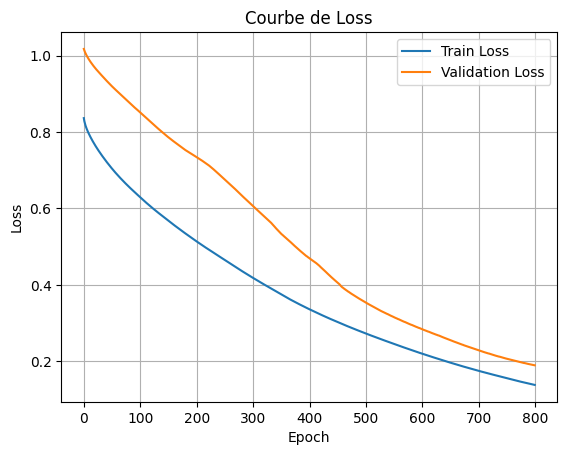

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from keras.models import load_model

best_model = load_model('/content/best_model_3.h5')

In [ ]:
# Appliquer le modèle pour prédire les variétés des Iris du jeu de test et stoker dans "y_test_pred"
y_test_pred=best_model.predict(x_test)

# créer un data frame df_y_test_pred
df_y_test_pred=pd.DataFrame(y_test_pred,columns=['setosa','versicolor','virginica'],index=y_test.index)
## selectionner la colonne qui a la plus grande probabilité
df_y_test_pred=df_y_test_pred.idxmax(axis="columns")
df_y_test=y_test.idxmax(axis="columns")

## concatener predictions et observées
df_y_test_pred= pd.concat([df_y_test,df_y_test_pred],keys=["obs","pred"],axis=1)
df_y_test_pred.head()

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


,obs,pred
94,versicolor,versicolor
57,versicolor,versicolor
118,virginica,virginica
61,versicolor,versicolor
68,versicolor,versicolor


In [ ]:

print("Matrice de confusion:")
cm = confusion_matrix(df_y_test_pred.obs,df_y_test_pred.pred)
print(pd.DataFrame(cm))
print(metrics.classification_report(df_y_test_pred.obs, df_y_test_pred.pred, digits=3))

Matrice de confusion:
    0   1   2
0  15   0   0
1   0  15   0
2   0   1  14
              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        15
  versicolor      0.938     1.000     0.968        15
   virginica      1.000     0.933     0.966        15

    accuracy                          0.978        45
   macro avg      0.979     0.978     0.978        45
weighted avg      0.979     0.978     0.978        45

